<a href="https://colab.research.google.com/github/sosarodrigox/coderhouse_emprendedores_it/blob/main/Emprendedores_IT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ Proyecto Final

### Análisis de Datos de Emprendedores en la Provincia de Entre Ríos (2016-2019).

### CoderHouse: Data Science II Machine Learning para ciencia de datos.

###  Rodrigo Sosa - Cohorte 2024
**LinkedIn: https://www.linkedin.com/in/sosarodrigo/**


### 📚 Introducción:
El dataset que utilizaré proviene de un archivo de Google Sheets asociado a un Google Form 📊 (Ver archivo). Este formulario fue diseñado para recopilar datos de emprendedores que participaron en la **Línea de Acción "Incorporación de Tecnología"**💡, un programa gestionado por el Ministerio de Desarrollo Social de Entre Ríos entre marzo de 2016 y agosto de 2019.

### 🚀 Objetivo:
El objetivo de este proyecto es analizar los datos recopilados en el formulario para identificar patrones y tendencias en la información proporcionada por los emprendedores registrados durante este periodo. A través de este análisis, espero obtener información valiosa que pueda ser utilizada para mejorar la eficacia de los programas de apoyo a los emprendedores en la provincia de Entre Ríos, específicamente mediante la provisión de maquinaria y herramientas bajo el esquema de ANR (Aportes No Reembolsables).

Como Técnico en Gestión y Administración Pública, me interesa profundizar en el análisis de datos para mejorar la toma de decisiones en el ámbito público. Este proyecto representa una oportunidad para aplicar los conocimientos adquiridos en el curso de Data Science II de CoderHouse y contribuir al desarrollo de políticas públicas que fomenten el emprendimiento en la provincia de Entre Ríos. 📈

Por otro lado, considero que uno de los grandes desafíos en la aplicación de políticas públicas radica en la selección subjetiva de beneficiarios, la evaluación de los resultados, la medición del impacto de las políticas implementadas, y la falta de información confiable y actualizada sobre la situación de los emprendedores en la provincia. Por ello, el análisis de datos es una herramienta fundamental para mejorar la eficacia de las políticas públicas y garantizar que los recursos se utilicen de manera eficiente y equitativa.

Por lo tanto, centraré mi análisis en los siguientes puntos:

* Identificar los principales sectores de actividad de los emprendedores en la provincia de Entre Ríos.
* Analizar la distribución geográfica de los emprendedores en la provincia.
* Evaluar la calidad de los datos registrados.
* Identificar los factores que influyen en la aprobación o desaprobación de los emprendedores.
* Determinar cuáles son las variables que más influyen en la aprobación de los emprendedores.
* Identificar las principales métricas para considerar como KPIs en el diseño de futuras políticas públicas.

### 1️⃣ Anonimizar el Dataset:

Dado que la privacidad es una prioridad 🔒, he eliminado todas las columnas que contenían información personal identificable. Consideré que estos datos no son necesarios para los objetivos de mi proyecto y que su inclusión no aportaría valor a los análisis que realizaré. Utilicé las herramientas propias de Google Sheets para eliminar las columnas y obtener el dataset de trabajo.

Las columnas eliminadas son:

* Nombre y apellido del emprendedor
* Teléfono celular y fijo del emprendedor
* Correo electrónico del emprendedor
* Dirección del emprendedor y del emprendimiento (generalmente es la misma)
* Tipo (todos los registros corresponden a DNI) y número de DNI
* Nombre y apellido del referente territorial
* Apellido del integrante del equipo técnico que realizó la entrevista.
* Teléfono del referente territorial

### 2️⃣ Carga de Datos desde GitHub

Creé el repositorio público en GitHub: https://github.com/sosarodrigox/coderhouse_emprendedores_it

Luego obtengo el enlace **RAW** del dataset para importarlo a mi notebook. Para lo mismo utilizo la librería **Pandas**.


In [54]:
# Importar librerías:
import pandas as pd  # Para manejo de datos
import missingno as msno  # Para visualización de datos faltantes
import re  # Para manejo de expresiones regulares
from nltk.corpus import stopwords  # Para manejo de stopwords
from nltk.tokenize import word_tokenize  # Para tokenización de palabras
from collections import Counter  # Para contar palabras
from wordcloud import WordCloud  # Para visualización de nubes de palabras
import matplotlib.pyplot as plt  # Para visualización de gráficos
import nltk  # Para procesamiento de lenguaje natural

# Descargar las stopwords y otros recursos necesarios de NLTK
nltk.download("stopwords")
nltk.download("punkt_tab")  # En VSC pide estos recursos
nltk.download("punkt")  # En colab pide estos recursos

# Definir las stopwords en español para futuros análisis
stop_words = set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/negrux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/negrux/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /Users/negrux/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
# Ruta del archivo Excel en GitHub
url = "https://github.com/sosarodrigox/coderhouse_emprendedores_it/raw/main/emprendedores%20_it.xlsx"

df = pd.read_excel(url)

# Configuración para mostrar todas las columnas
pd.set_option("display.max_columns", None)  # Muestra todas las columnas sin cortes
pd.set_option(
    "display.expand_frame_repr", False
)  # Evita el salto de línea entre las columnas

# Mostrar las primeras filas
df.head(2)

,Marca temporal,Marcar entrevista como:,Fecha de la entrevista:,Fecha de la entrevista-Final:,Equipo Técnico:,Referencia a Expediente:,Localidad:,Departamento:,Fecha de Nacimiento-Final:,Sexo:,Estado Civil:,Nivel de Estudio Actual:,Situación Laboral PRINCIPAL:,Situación Habitacional:,Tipo de vivienda:,Situación Familiar:,Situación ante el IVA:,Observaciones Respecto al IVA:,Tramitó la Exención Impositiva en ATER?:,Ingreso MENSUAL de su Economía Familiar:,Nombre del emprendimiento:,Facebook del emprendimiento:,E-mail (Del Emprendimiento):,Descripción del Emprendimiento:,Antigüedad del Emprendimiento (Años):,Antigüedad del Emprendimiento (Meses):,Tiempo que dedica al emprendimiento (Días a la semana):,Tiempo que dedica al emprendimiento (Horas por día):,Realizó algún tipo de capacitación previa para su emprendimiento:,"En caso de haber recibido algún tipo de capacitación, marque cuales:",Cantidad de personas involucradas en el emprendimiento:,Qué función cumplen?:,Cómo realiza sus ventas? / Cómo ofrece sus servicios?:,Utiliza tarjeta de crédito para realizar sus ventas?:,Cantidad de clientes:,Facturación Mensual (Ingresos Brutos):,Costo Mensual (Egresos):,Ganancia Mensual-Final:,Detallar el nivel de producción semanal:,Donde compra la materia prima?:,El emprendimiento se desarrolla en un ámbito:,Donde realiza su producción? / Donde ofrece su servicio?:,Condiciones del espacio físico donde desarrolla el emprendimiento:,Observaciones del espacio productivo:,Qué habilitaciones posee su espacio productivo?:,Servicio Eléctrico:,Servicio de Gas:,Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:,En qué invirtió o para qué utilizó el fortalecimiento adquirido?:,Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:,Equipamiento con el que cuenta:,Herramientas o equipamiento que solicita:,Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as:,Devolución con respecto a la gestión de la herramienta o equipamiento:,Evaluación Final:,Herramienta/as aprobada/as por Equipo Técnico:,Monto Máximo ($) aprobado por Equipo Técnico:,Herramienta comprada Efectivamente:,Observaciones de la entrevista:,Rubro:,Sub-Rubro:,Sub-Rubro:.1,Sub-Rubro-Final:,Actividad:,Actividad:.1,Actividad:.2,Actividad:.3,Actividad:.4,Actividad:.5,Actividad:.6,Actividad:.7,Actividad:.8,Actividad:.9,Actividad:.10,Actividad:.11,Actividad:.12,Actividad:.13,Actividad:.14,Actividad:.15,Actividad-Final:
0,2016-03-18 09:27:30.592,La entrevista se realizó correctamente.,2016-03-17 00:00:00,2016-03-17 00:00:00,Gisela,NaN,Gualeguaychú,Gualeguaychú,1971-02-09 00:00:00,Femenino,Casada/o,Secundario Completo,Autoempleado,Vivienda Alquilada,TIPO B,Vive con su esposo quien realiza changas de ja...,Monotributo Social,NaN,SI,6000.0,Lo Nuestro,Lo Nuestro,NaN,"Pre pizzas, pasta frolas, cremonas, pan sabori...",12.0,0.0,48.0,0.0,SI,Capacitación en el Oficio,1,"Los dos hacen todo, Brenda hace lo de reposter...","Tiene un puesto fijo en una Feria., Coordina l...",NO,15,4000.0,2500.0,1500,10 a 30 kg de harina,mayoristas locales,Urbano,En su casa. (No posee un espacio destinado al ...,Regular.,"Muy chico. 3 x 5 m. Techo cieloraso, piso cera...",Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,Insumos- Elementos de Cocina,No,"Horno 6 moldes pizzero, Heladera familiar, bat...",Amasadora y sobadora de mesa,Para agregar otros productos con hojaldre y ag...,Aprobado,Se considera necesario otorgar la maquinaria s...,Amasadora y Sobadora,22.0,NaN,La producción es por pedido pero tienen pedido...,Producción,NaN,PANIFICACIÓN,PANIFICACIÓN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pastelería,NaN,NaN,NaN,Pastelería
1,2016-03-31 11:41:15.357,La entrevista se realizó correctamente.,2016-03-18 00:00:00,2016-03-18 00:00:00,Rodrigo,NaN,Victoria,Victoria,1971-02-10 00:00:00,Masculino,Casada/o,Secundario Incompleto,Empleado,Vivienda Propia,Tipo A,El e

### 3️⃣ Data Wrangling:

El Data Wrangling, también conocido como data cleaning o preparación de datos, es el proceso de transformar y mapear los datos brutos en un formato más adecuado para el análisis. Este paso es crucial para asegurarse de que los datos sean consistentes, estén limpios y sean utilizables para análisis posteriores.

Tareas comunes de Data Wrangling:

*   Eliminar columnas irrelevantes o redundantes.
*   Cambiar los nombres de las columnas para que sean más descriptivos o consistentes.
*   Manejo de valores faltantes (rellenar, eliminar o imputar).
*   Corrección de tipos de datos (por ejemplo, convertir fechas de texto a formato de fecha).
*   Eliminar duplicados en los datos.
*   Transformar datos (normalización, estandarización, etc.).
*   Fusionar datasets (merge, join)

**Comenzaremos con la comprensión y exploración Inicial de los Datos en el dataset.**


In [56]:
# Información de las columnas del dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 80 columns):
 #   Column                                                                                                          Non-Null Count  Dtype         
---  ------                                                                                                          --------------  -----         
 0   Marca temporal                                                                                                  1263 non-null   datetime64[ns]
 1   Marcar entrevista como:                                                                                         1263 non-null   object        
 2   Fecha de la entrevista:                                                                                         1263 non-null   object        
 3   Fecha de la entrevista-Final:                                                                                   1263 non-null   object        
 4   

In [57]:
# Descripción estadística de los valores dentro del dataset:
df.describe()

,Marca temporal,Ingreso MENSUAL de su Economía Familiar:,Antigüedad del Emprendimiento (Años):,Antigüedad del Emprendimiento (Meses):,Tiempo que dedica al emprendimiento (Días a la semana):,Tiempo que dedica al emprendimiento (Horas por día):,Facturación Mensual (Ingresos Brutos):,Costo Mensual (Egresos):,Ganancia Mensual-Final:,Monto Máximo ($) aprobado por Equipo Técnico:,Actividad:.2
count,1263,1.250000e+03,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03,1.250000e+03,1.263000e+03,340.000000,0.0
mean,2017-10-24 19:43:54.098140928,9.111398e+05,6.869600,1.510400,5.264000,7.425600,9.497257e+03,1.230042e+04,-2.774307e+03,18742.741176,NaN
min,2016-03-18 09:27:30.592000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,-1.000000e+07,10.000000,NaN
25%,2016-10-18 10:18:36.039499776,7.000000e+03,1.000000,0.000000,5.000000,6.000000,4.000000e+03,1.000000e+03,2.500000e+03,15000.000000,NaN
50%,2017-11-14 13:27:01.836000,1.200000e+04,4.000000,0.000000,6.000000,8.000000,6.000000e+03,2.000000e+03,4.000000e+03,17000.000000,NaN
75%,2018-09-17 10:58:50.444499968,1.800000e+04,10.000000,0.000000,6.000000,8.000000,1.000000e+04,4.000000e+03,6.500000e+03,20000.000000,NaN
max,2019-08-29 11:59:11.432000,1.111111e+09,50.000000,12.000000,48.000000,24.000000,1.111111e+06,1.111111e+07,3.800000e+04,150000.000000,NaN
std,NaN,3.142791e+07,8.239885,2.909134,1.826958,2.886924,3.217233e+04,3.142174e+05,2.815720e+05,12269.771555,NaN


In [58]:
# Forma del conjunto de datos:
df.shape

(1263, 80)

<Axes: >

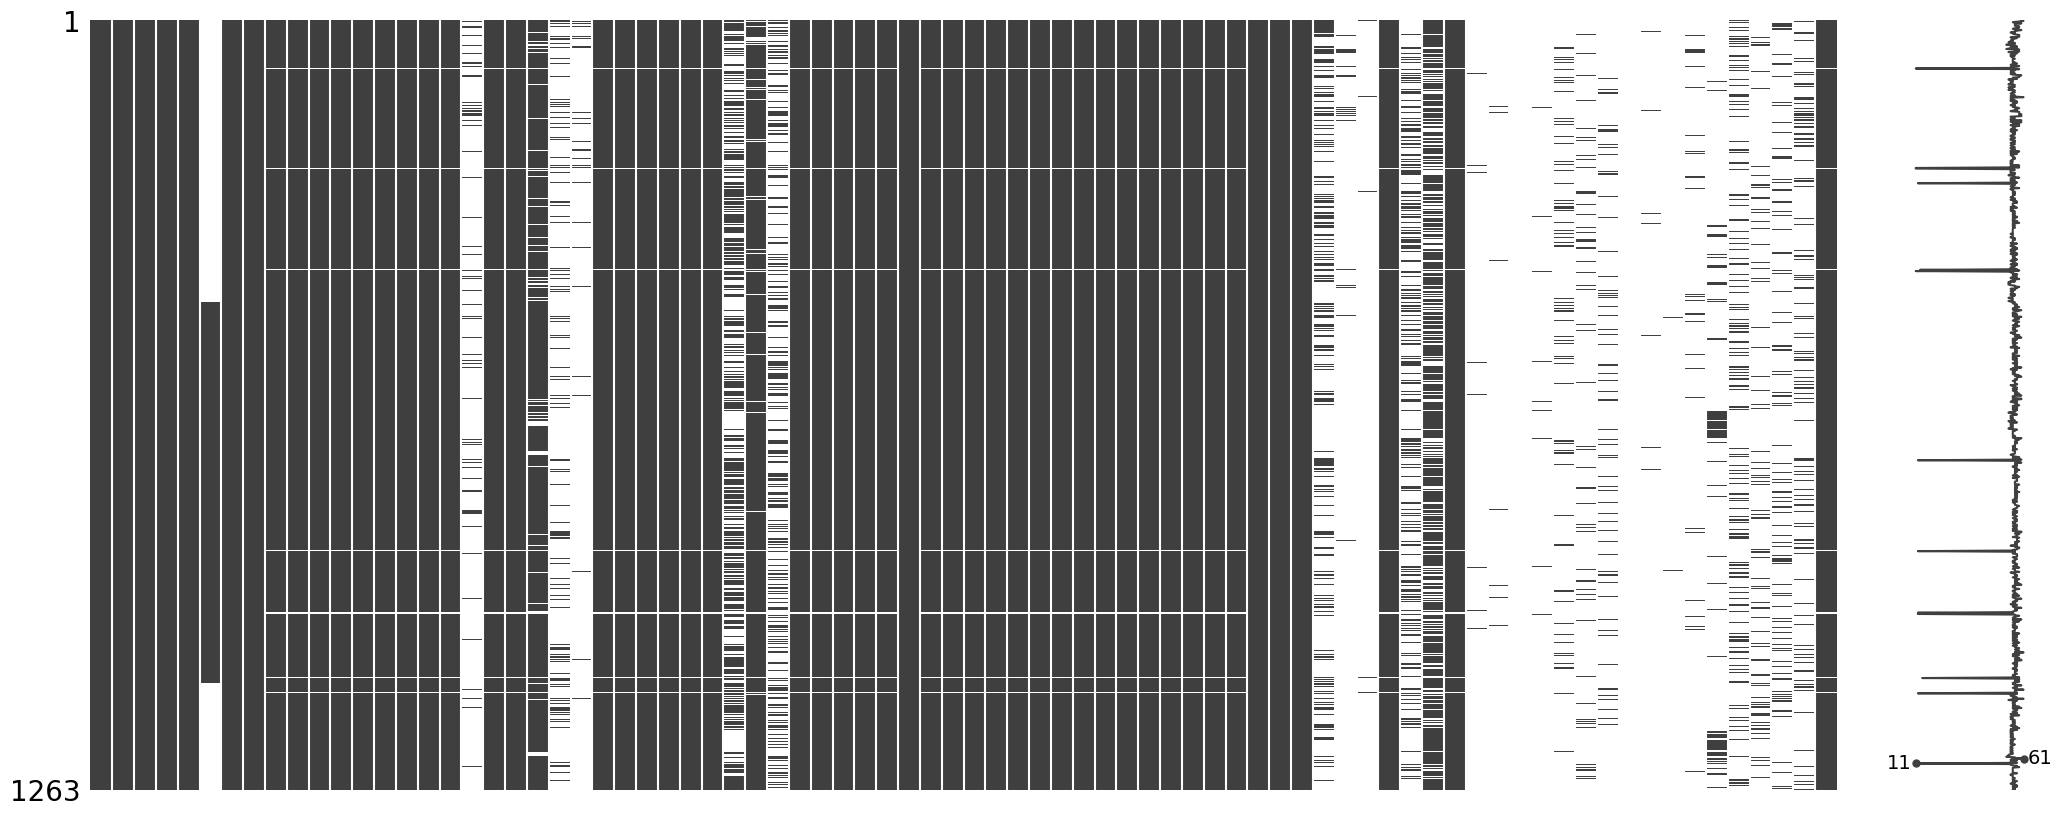

In [59]:
# Visualizar los valores nulos graficamente:
msno.matrix(df)

<Axes: >

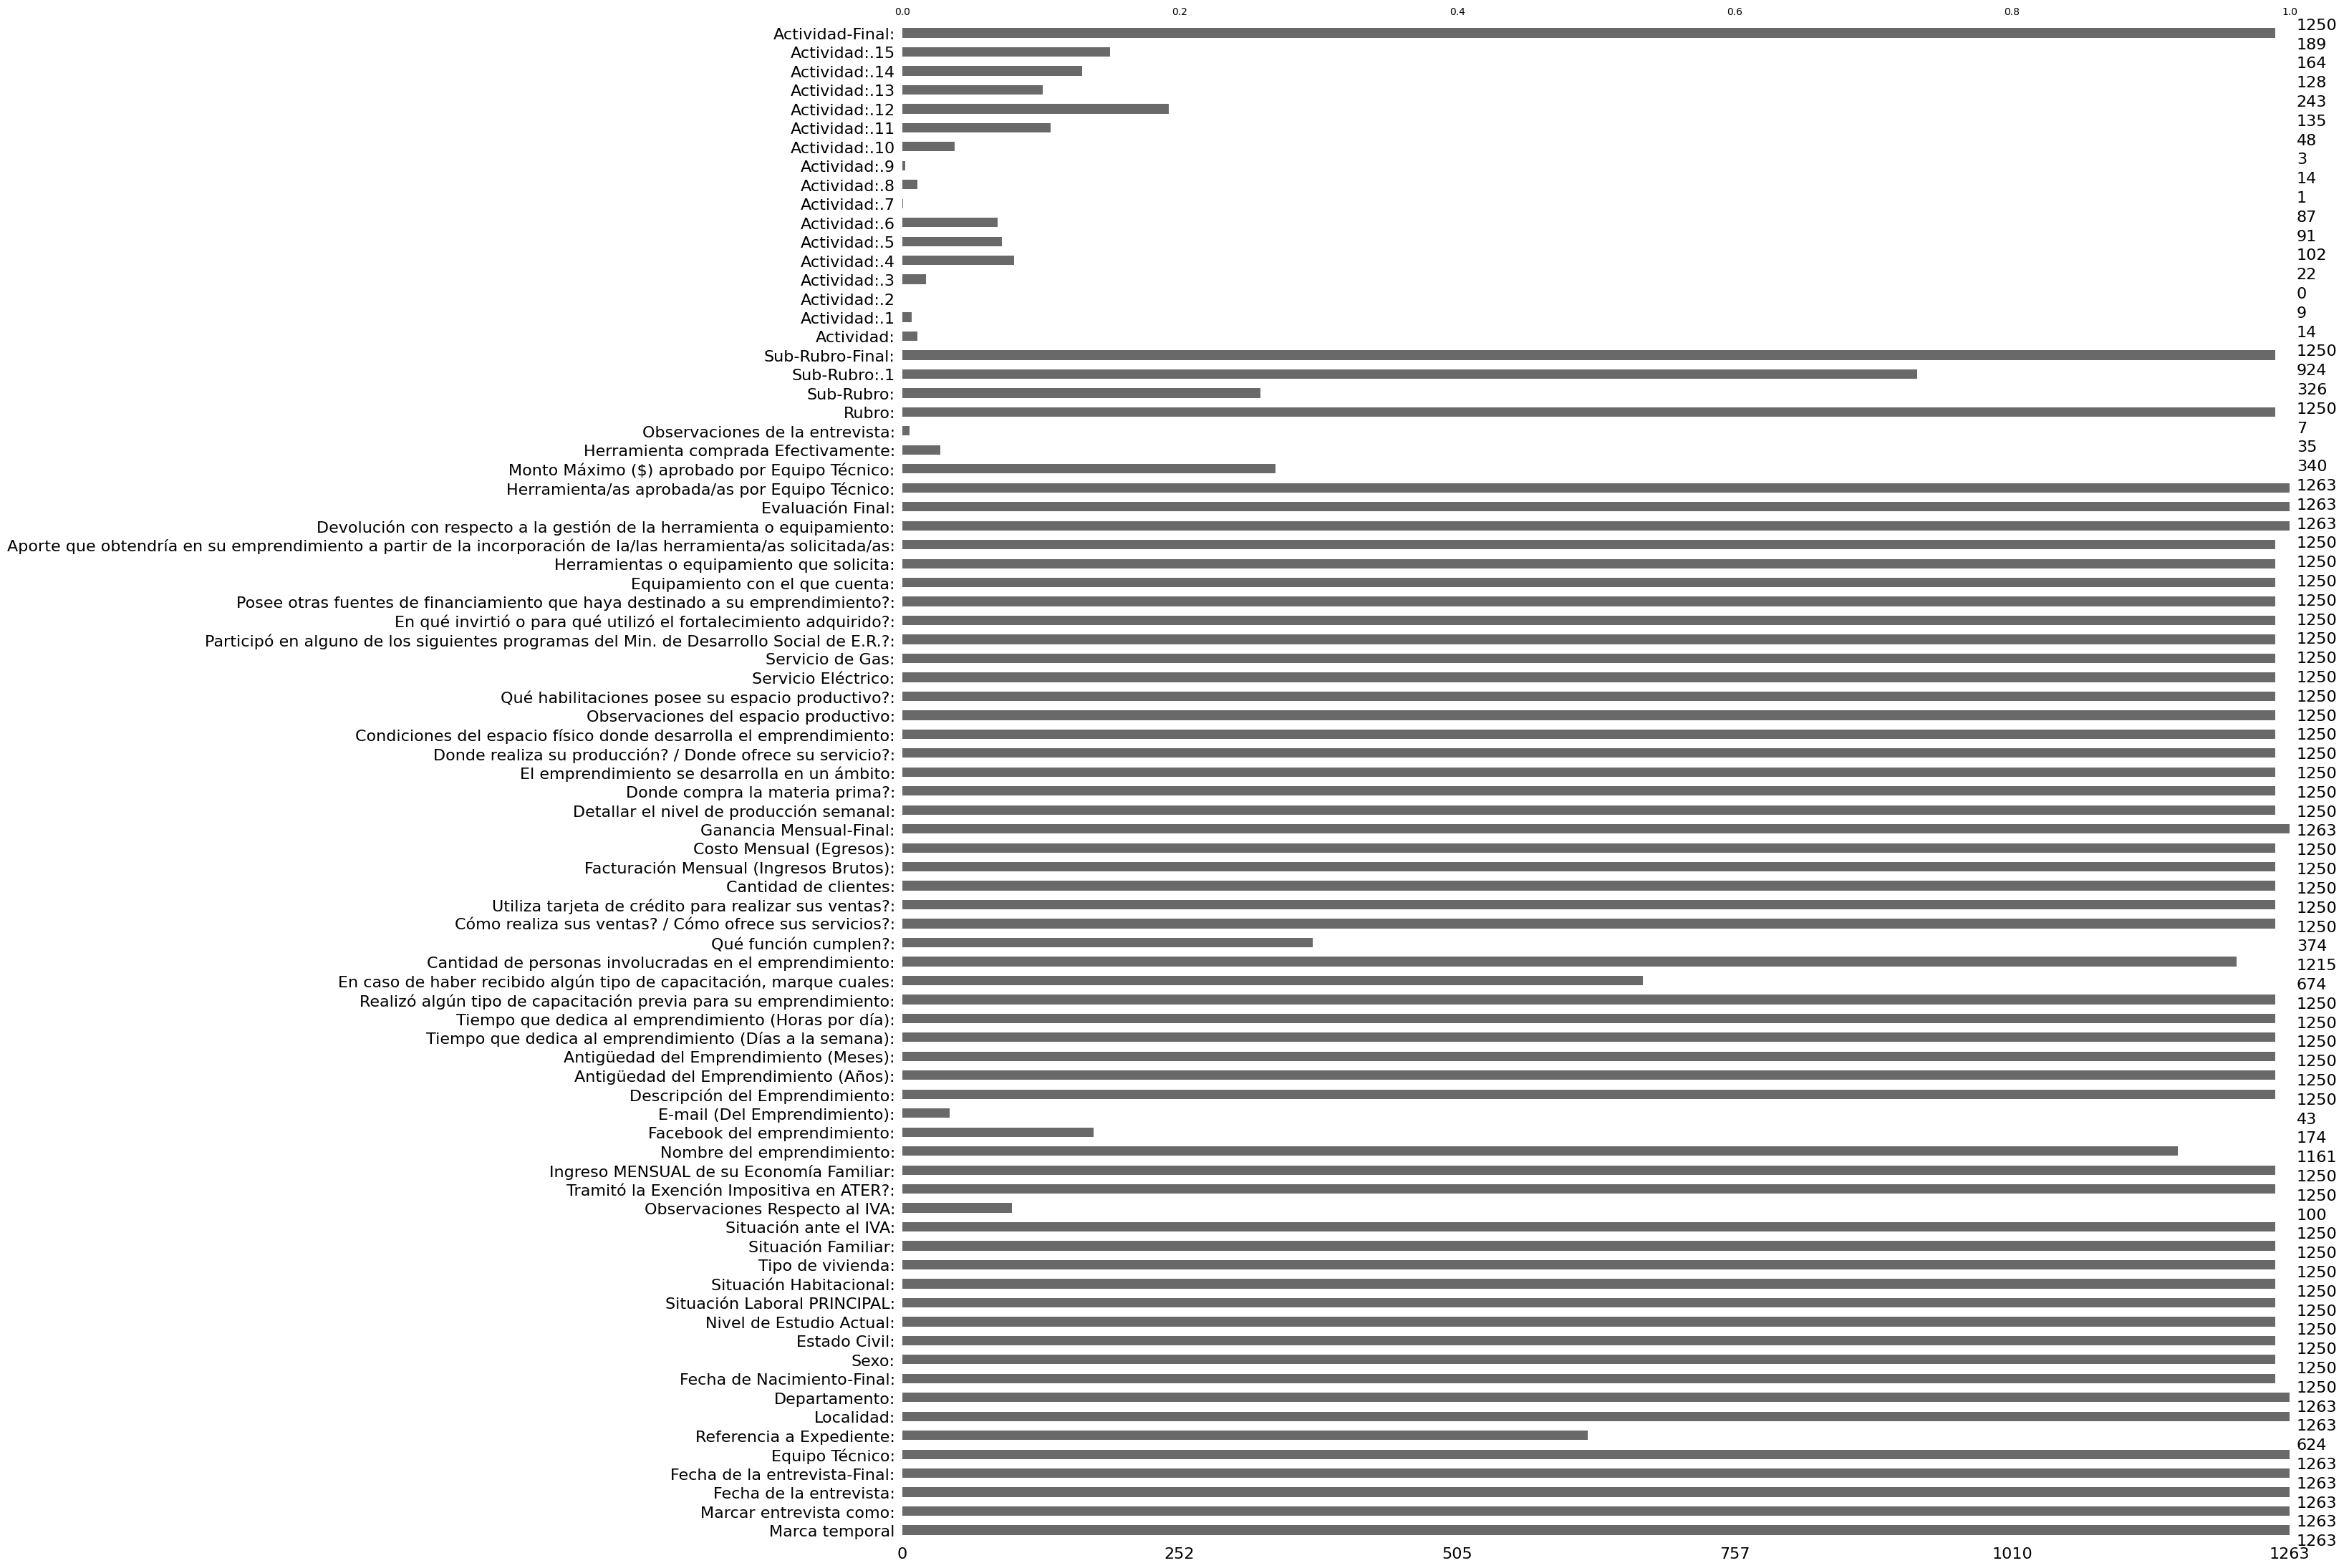

In [60]:
# Visualiza los valores nulos con una gráfica de barras
msno.bar(df)

In [61]:
# Calcular la Cantidad de Valores Nulos por Columna.
valores_nulos = df.isnull().sum()

# Clasificar las Columnas Según los Rangos de Valores Nulos.

# a) Columnas Sin Ningún Valor Nulo:
columnas_sin_nulos = valores_nulos[valores_nulos == 0].index.tolist()
print("Columnas sin valores nulos:", columnas_sin_nulos)

# b) Columnas con Mas de 200 Valores Nulos:
columnas_mas_200_nulos = valores_nulos[valores_nulos > 200].index.tolist()
print("Columnas con mas de 200 valores nulos:", columnas_mas_200_nulos)

# c) Columnas con Entre 50 y 200 Valores Nulos:
columnas_50_200_nulos = valores_nulos[valores_nulos.between(50, 200)].index.tolist()
print("Columnas con entre 50 y 200 valores nulos:", columnas_50_200_nulos)

# d) Columnas con Entre 1 y 50 Valores Nulos:
columnas_1_50_nulos = valores_nulos[valores_nulos.between(1, 50)].index.tolist()
print("Columnas con entre 1 y 50 valores nulos:", columnas_1_50_nulos)

# e) Columnas con Todos sus Valores Nulos:
columnas_todos_nulos = valores_nulos[valores_nulos == df.shape[0]].index.tolist()
print("Columnas con todos sus valores nulos:", columnas_todos_nulos)

Columnas sin valores nulos: ['Marca temporal', 'Marcar entrevista como:', 'Fecha de la entrevista:', 'Fecha de la entrevista-Final:', 'Equipo Técnico:', 'Localidad:', 'Departamento:', 'Ganancia Mensual-Final:', 'Devolución con respecto a la gestión de la herramienta o equipamiento:', 'Evaluación Final:', 'Herramienta/as aprobada/as por Equipo Técnico:']
Columnas con mas de 200 valores nulos: ['Referencia a Expediente:', 'Observaciones Respecto al IVA:', 'Facebook del emprendimiento:', 'E-mail (Del Emprendimiento):', 'En caso de haber recibido algún tipo de capacitación, marque cuales:', 'Qué función cumplen?:', 'Monto Máximo ($) aprobado por Equipo Técnico:', 'Herramienta comprada Efectivamente:', 'Observaciones de la entrevista:', 'Sub-Rubro:', 'Sub-Rubro:.1', 'Actividad:', 'Actividad:.1', 'Actividad:.2', 'Actividad:.3', 'Actividad:.4', 'Actividad:.5', 'Actividad:.6', 'Actividad:.7', 'Actividad:.8', 'Actividad:.9', 'Actividad:.10', 'Actividad:.11', 'Actividad:.12', 'Actividad:.13', 'A

Luego del análisis exploratorio inicial del dataset observamos lo siguiente:

* El dataset contiene 80 columnas y 1263 registros. Cada registro representa un emprendedor que ha sigo cargado por un técnico administrativo a través del formulario de Google. 💻

#### Interpretación de los valores nulos según su distribución en el dataset:

  - `a) Columnas sin valores nulos:`
    -  ❌ 'Marca temporal': Representa el momento en que se cargó el formulario. No es tan relevante para mis objetivos por el momento.

    - ✅ 'Marcar entrevista como': Es importante que no haya valores nulos porque es relevante saber si la entrevista se pudo realizar, o cual fue la razón por la que no se realizó la misma.

    -  ❌ 'Fecha de la entrevista': Momento en que se visitó al emprendedor, un dato muy relevante para a futuro realizar series de tiempo.

    - ✅ 'Fecha de la entrevista-Final': Es el mismo dato que el anterior pero se le ha aplicado una fórmula de excel para que devuelva la fecha en formato DD/MM/AAAA (Puedo eliminar la columna 'Fecha de la entrevista')

    - ✅ 'Equipo Técnico': Representa a la persona que cargó el formulario y generalmente la que realizó la entrevista al emprendedor. No es relevante para mis objetivos actuales, aunque a futuro se podría medir la tendencias o sesgos del personal en la aprobación de los beneficiarios.

    - ✅ 'Localidad' y 'Departamento': Datos para geolocalización de los emprendedores entrevistados.

    - ✅ 'Ganancia Mensual-Final': Representa la diferencia entre los ingresos del emprendimiento y los costos de producir u ofrecer un servicio. Dato importante para evaluar el impacto de la participación en el programa del emprendedor a futuro.

    - ✅ 'Devolución con respecto a la gestión de la herramienta o equipamiento': Dado que es una variable categórica con posible resultado Aprobado/No aprobado, considero que es una variable muy relevante ya que puede ser considerada como variable objetivo de una regresión lineal.

    - 📝 'Evaluación Final': Breve justificación donde cada entrevistador declara el motivo de su evaluación como positiva o negativa. Es importante que este dato no sea nulo, aunque pueda ser dificil de manejar dato su variabilidad. Podría visualizarce como una nube de palabras.

    - 📝🛠️ 'Herramienta/as aprobada/as por Equipo Técnico': Detalle de las herramientas que se le otorgarán al emprendedor en caso de ser aprobado. Dato relevante para evaluar el impacto de la participación en el programa del emprendedor a futuro. Podría realizarce un análisis de frecuencia de las herramientas más solicitadas.

  - `b) Columnas con mas de 200 valores nulos:`
    -  ❌ 'Referencia a Expediente': Dato poco relevante para mi objetivo, además el equipo tecnico observó que raramente vincularon el formulario al expediente una vez obtenido su numero de identificación.

    -  ❌ 'Observaciones Respecto al IVA': Dato poco relevante para mi objetivo, aunque podría ser relevante para evaluar la situación impositiva de los emprendedores.

    -  ❌ 'Facebook del emprendimiento': Dato poco relevante para mi objetivo, aunque podría ser relevante para evaluar la presencia en redes de los emprendedores. El equipo técnico observó que pocos tenian redes sociales.

    -  ❌ 'E-mail (Del Emprendimiento)': Dato poco relevante para mi objetivo, el equipo técnico observó que pocos tenian correo electrónico.

    -  🛠️ 'En caso de haber recibido algún tipo de capacitación marque cuales': Puede ser relevante para evaluar la capacitación previa de los emprendedores y como este valor repercute en su aprobación. Evaluar si la cantidad de datos permite realizar un análisis de frecuencia.

    -  ❌ 'Qué función cumplen?': Poco relevante para mi objetivo, se refiere a las tareas de otros integrantes en un emprendimiento asociativo si fuera el caso.

    -  ❌ 'Monto Máximo ($) aprobado por Equipo Técnico': Es un dato relevante, pero el equipo técnico observó que generalmente no se establecía dado el contexto inflacionario de la economía.

    -  ❌ 'Herramienta comprada Efectivamente': Es un dato relevante para el análisis, pero el equipo observó que los pocos datos que se cargaron, no eran fiables.

    -  ❌ 'Observaciones de la entrevista': La mayoría de sus datos son nulos, su registro no era obligatorio por lo que el equipo técnico en general no registró observaciones de cada entrevista.

    -  ❌ 'Sub-Rubro' y 'Sub-Rubro1': Estas columnas son las utilizadas para obtener el 'Sub-Rubro-Final' por medio de operaciones en la planilla asociada al formulario, se pueden eliminar.

    -  ❌ 'Actividad', 'Actividad.1', 'Actividad.2', 'Actividad.3', 'Actividad.4', 'Actividad.5', 'Actividad.6', 'Actividad.7', 'Actividad.8', 'Actividad.9', 'Actividad.10', 'Actividad.11', 'Actividad.12', 'Actividad.13', 'Actividad.14' y 'Actividad.15': Estas columnas son las utilizadas para obtener la columna 'Actividad-Final' por medio de operaciones en la planilla asociada al formulario, se pueden eliminar.

  - `c) Columnas con entre 50 y 200 valores nulos:`
    - ❌ 'Nombre del emprendimiento': Dato poco relevante para mi objetivo, aunque puede servir para identificar a los emprendedores y realizar análisis de frecuencia de los nombres más comunes.

  - `d) Columnas con entre 1 y 50 valores nulos:`
    - 🧩 'Fecha de Nacimiento-Final': Es un dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Sexo': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Estado Civil': Dato poco relevante para mi objetivo, aunque puede ser relevante para evaluar la situación familiar de los emprendedores a futuro.

    - 🧩 'Nivel de Estudio Actual': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Situación Laboral PRINCIPAL': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Situación Habitacional': Dato algo relevante para el objetivo, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Tipo de vivienda': Dato algo relevante para el objetivo, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    -  ❌ 'Situación Familiar': Dato poco relevante para mi objetivo, aunque puede ser relevante para evaluar la situación familiar de los emprendedores a futuro.

    - 🧩 'Situación ante el IVA': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    -  ❌ 'Tramitó la Exención Impositiva en ATER?': Dato poco relevante para el análisis, se puede eliminar.

    - 🧩 'Ingreso MENSUAL de su Economía Familiar': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 📝🛠️ 'Descripción del Emprendimiento': Dato relevante pero difícil de manejar por su variabilidad, se puede realizar un análisis de frecuencia de las palabras más utilizadas.

    - 🛠️ 'Antigüedad del Emprendimiento (Años)': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Tratar de unificar con 'Antigüedad del Emprendimiento (Meses)'.

    - 🛠️ 'Antigüedad del Emprendimiento (Meses)': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Tratar de unificar con 'Antigüedad del Emprendimiento (Años)'.

    - 🛠️ 'Tiempo que dedica al emprendimiento (Días a la semana)': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Tratar de unificar con 'Tiempo que dedica al emprendimiento (Horas por día)'.

    - 🛠️ 'Tiempo que dedica al emprendimiento (Horas por día)': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Tratar de unificar con 'Tiempo que dedica al emprendimiento (Días a la semana)'.

    - 🧩 'Realizó algún tipo de capacitación previa para su emprendimiento': Dato relevante para el objetivo, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Es probable que se pueda realizar un análisis de frecuencia a futuro.

    - 📝 'Cantidad de personas involucradas en el emprendimiento': Dato medianamente relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🛠️ 'Cómo realiza sus ventas? / Cómo ofrece sus servicios?': Dato relevante para el análisis.El mismo cuenta respuestas preseteadas resultado de un input tipo casilla de verificación. Evaluar como manipular los datos.

    - 🧩 'Utiliza tarjeta de crédito para realizar sus ventas?': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 📝 'Cantidad de clientes': Dato relevante pero difícil de manejar por su variabilidad, se puede realizar un análisis de frecuencia de las palabras más utilizadas.

    - ❌ 'Facturación Mensual (Ingresos Brutos)': Dato poco relevante para el anális ya que se tomará la "Ganancia Mensual-Final" la cual es resultado de la facturación - el costo mensual.

    - ❌ 'Costo Mensual (Egresos)': Dato poco relevante para el anális ya que se tomará la "Ganancia Mensual-Final" la cual es resultado de la facturación - el costo mensual.

    - 📝 'Detallar el nivel de producción semanal':  Dato relevante pero difícil de manejar por su variabilidad, se puede realizar un análisis de frecuencia de las palabras más utilizadas.

    - ❌ 'Donde compra la materia prima?': Dato poco relevante para los objetivos del análisis.

    - 🧩 'El emprendimiento se desarrolla en un ámbito': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🛠️ 'Donde realiza su producción? / Donde ofrece su servicio?': Dato relevante para el análisis.El mismo cuenta respuestas preseteadas resultado de un input tipo casilla de verificación. Evaluar como manipular los datos.

    - 🧩 'Condiciones del espacio físico donde desarrolla el emprendimiento': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 📝 'Observaciones del espacio productivo': Dato poco relevante para los objetivos del análisis.

    - 🛠️ 'Qué habilitaciones posee su espacio productivo?': Dato relevante para el análisis.El mismo cuenta respuestas preseteadas resultado de un input tipo casilla de verificación. Evaluar como manipular los datos.

    - 🧩 'Servicio Eléctrico':  Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Servicio de Gas':  Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🛠️ 'Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?': Dato relevante para el análisis.El mismo cuenta respuestas preseteadas resultado de un input tipo casilla de verificación. Evaluar como manipular los datos.

    - 📝 'En qué invirtió o para qué utilizó el fortalecimiento adquirido?':  Dato poco relevante para los objetivos del análisis.

    - 📝 'Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?':  Dato poco relevante para los objetivos del análisis.

    - 📝🛠️ 'Equipamiento con el que cuenta': Dato poco relevante para los objetivos del análisis.

    - 📝🛠️ 'Herramientas o equipamiento que solicita':  Dato poco relevante para los objetivos del análisis.

    - 📝🛠️ 'Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as':  Dato poco relevante para los objetivos del análisis.

    - 🕵️‍♂️🧩 'Rubro': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🕵️‍♂️🧩 'Sub-Rubro-Final': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🕵️‍♂️🧩 'Actividad-Final': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

  - `Columnas con todos sus valores nulos:`
    - ❌ 'Actividad:.2': Esta columna es utilizada para obtener la columna 'Actividad-Final' por medio de operaciones en la planilla asociada al formulario, se pueden eliminar.

#### ❌ Eliminación de columnas innecesarias del dataset:

Elimino las columnas que identifiqué como irrelevantes para mi objetivo o que el equipo técnico señaló como poco fiables y también aquellas con demasiados valores nulos (más de 200) en el paso anterior. Estas columnas no aportan información relevante para los objetivos de mi proyecto y su eliminación simplificará el análisis de los datos.

In [62]:
columnas_a_eliminar = [
    "Marca temporal",
    "Fecha de la entrevista:",
    "Referencia a Expediente:",
    "Observaciones Respecto al IVA:",
    "Tramitó la Exención Impositiva en ATER?:",
    "Nombre del emprendimiento:",
    "Facebook del emprendimiento:",
    "E-mail (Del Emprendimiento):",
    "Situación Familiar:",
    "Qué función cumplen?:",
    "Facturación Mensual (Ingresos Brutos):",
    "Costo Mensual (Egresos):",
    "Donde compra la materia prima?:",
    "Monto Máximo ($) aprobado por Equipo Técnico:",
    "Herramienta comprada Efectivamente:",
    "Observaciones de la entrevista:",
    "Sub-Rubro:",
    "Sub-Rubro:.1",
    "Actividad:",
    "Actividad:.1",
    "Actividad:.2",
    "Actividad:.3",
    "Actividad:.4",
    "Actividad:.5",
    "Actividad:.6",
    "Actividad:.7",
    "Actividad:.8",
    "Actividad:.9",
    "Actividad:.10",
    "Actividad:.11",
    "Actividad:.12",
    "Actividad:.13",
    "Actividad:.14",
    "Actividad:.15",
]

# Eliminar las columnas seleccionadas:
df.drop(columnas_a_eliminar, inplace=True, axis=1)

In [63]:
# Mostrar la nueva forma del conjunto de datos: (1263 Registros, 46 Columnas)
df.shape

(1263, 46)

In [64]:
# Copio el dataframe "df" y lo asigno como "df_drop":
df_drop = df.copy()
df_drop.head(3)

,Marcar entrevista como:,Fecha de la entrevista-Final:,Equipo Técnico:,Localidad:,Departamento:,Fecha de Nacimiento-Final:,Sexo:,Estado Civil:,Nivel de Estudio Actual:,Situación Laboral PRINCIPAL:,Situación Habitacional:,Tipo de vivienda:,Situación ante el IVA:,Ingreso MENSUAL de su Economía Familiar:,Descripción del Emprendimiento:,Antigüedad del Emprendimiento (Años):,Antigüedad del Emprendimiento (Meses):,Tiempo que dedica al emprendimiento (Días a la semana):,Tiempo que dedica al emprendimiento (Horas por día):,Realizó algún tipo de capacitación previa para su emprendimiento:,"En caso de haber recibido algún tipo de capacitación, marque cuales:",Cantidad de personas involucradas en el emprendimiento:,Cómo realiza sus ventas? / Cómo ofrece sus servicios?:,Utiliza tarjeta de crédito para realizar sus ventas?:,Cantidad de clientes:,Ganancia Mensual-Final:,Detallar el nivel de producción semanal:,El emprendimiento se desarrolla en un ámbito:,Donde realiza su producción? / Donde ofrece su servicio?:,Condiciones del espacio físico donde desarrolla el emprendimiento:,Observaciones del espacio productivo:,Qué habilitaciones posee su espacio productivo?:,Servicio Eléctrico:,Servicio de Gas:,Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:,En qué invirtió o para qué utilizó el fortalecimiento adquirido?:,Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:,Equipamiento con el que cuenta:,Herramientas o equipamiento que solicita:,Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as:,Devolución con respecto a la gestión de la herramienta o equipamiento:,Evaluación Final:,Herramienta/as aprobada/as por Equipo Técnico:,Rubro:,Sub-Rubro-Final:,Actividad-Final:
0,La entrevista se realizó correctamente.,2016-03-17 00:00:00,Gisela,Gualeguaychú,Gualeguaychú,1971-02-09 00:00:00,Femenino,Casada/o,Secundario Completo,Autoempleado,Vivienda Alquilada,TIPO B,Monotributo Social,6000.0,"Pre pizzas, pasta frolas, cremonas, pan sabori...",12.0,0.0,48.0,0.0,SI,Capacitación en el Oficio,1,"Tiene un puesto fijo en una Feria., Coordina l...",NO,15,1500,10 a 30 kg de harina,Urbano,En su casa. (No posee un espacio destinado al ...,Regular.,"Muy chico. 3 x 5 m. Techo cieloraso, piso cera...",Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,Insumos- Elementos de Cocina,No,"Horno 6 moldes pizzero, Heladera familiar, bat...",Amasadora y sobadora de mesa,Para agregar otros productos con hojaldre y ag...,Aprobado,Se considera necesario otorgar la maquinaria s...,Amasadora y Sobadora,Producción,PANIFICACIÓN,Pastelería
1,La entrevista se realizó correctamente.,2016-03-18 00:00:00,Rodrigo,Victoria,Victoria,1971-02-10 00:00:00,Masculino,Casada/o,Secundario Incompleto,Empleado,Vivienda Propia,Tipo A,No se encuentra inscripto,8000.0,Claudio lleva adelante un emprendimiento dedic...,5.0,6.0,6.0,5.0,SI,Capacitación en el Oficio,Emprendimiento individual,La gente lo conoce y va a su domicilio o lo llama,NO,"Posee alrededor de cuarenta clientes fijos, y ...",3500,"Alrededor de diez trabajos por semana, dependi...",Urbano,En su casa. (Posee un espacio separado destina...,Bueno.,El emprendedor practica su emprendimiento en e...,Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,Utilizó el financiamiento para la compra de he...,No posee otras fuentes de financiamiento.,"Moto-esmeriladora de banco, cargador de baterí...",Soldadora autógena.,El emprendedor utilizará esta herramientas par...,Aprobado,Como equipo técnico consideramos relevante apo...,Soldadora Autógena,Servicios generales,Servicio mecánico,Mecánica del automotor
2,La entrevista se realizó correctamente.,2016-04-21 00:00:00,Gisela,San José,Colón,1978-08-03 00:00:00,Masculino,Divorciada/o,Universitario Incompleto,Autoempleado,Vivienda Alquilada,Tipo A,Monotributo Social,5000.0,"Realiza Joyería en alpaca, 

### 🧩 Imputación de valores faltantes:

Para las columnas que considero relevantes y que tienen algunos valores nulos (Entre 1 y 50), evaluaré la posibilidad de imputar los valores faltantes utilizando la media, la mediana o la moda de los datos disponibles. También puedo consultar al equipo técnico para obtener información adicional sobre los emprendedores y completar los datos faltantes (Esto es mas difícil dado que es un programa que se ejecutó en el período 2016-2019).

In [65]:
columnas_a_imputar = [
    "Fecha de Nacimiento-Final:",
    "Sexo:",
    "Estado Civil:",
    "Nivel de Estudio Actual:",
    "Situación Laboral PRINCIPAL:",
    "Situación Habitacional:",
    "Tipo de vivienda:",
    "Situación ante el IVA:",
    "Ingreso MENSUAL de su Economía Familiar:",
    "Realizó algún tipo de capacitación previa para su emprendimiento:",
    "Utiliza tarjeta de crédito para realizar sus ventas?:",
    "El emprendimiento se desarrolla en un ámbito:",
    "Condiciones del espacio físico donde desarrolla el emprendimiento:",
    "Servicio Eléctrico:",
    "Servicio de Gas:",
]

Es probable que muchos de estos valores sean nulos porque la entrevista no pudo concretarse o alguna situación excepcional. Primero voy a evaluar que representan los registros con muchos o todos sus valores nulos.

(13, 46)


<Axes: >

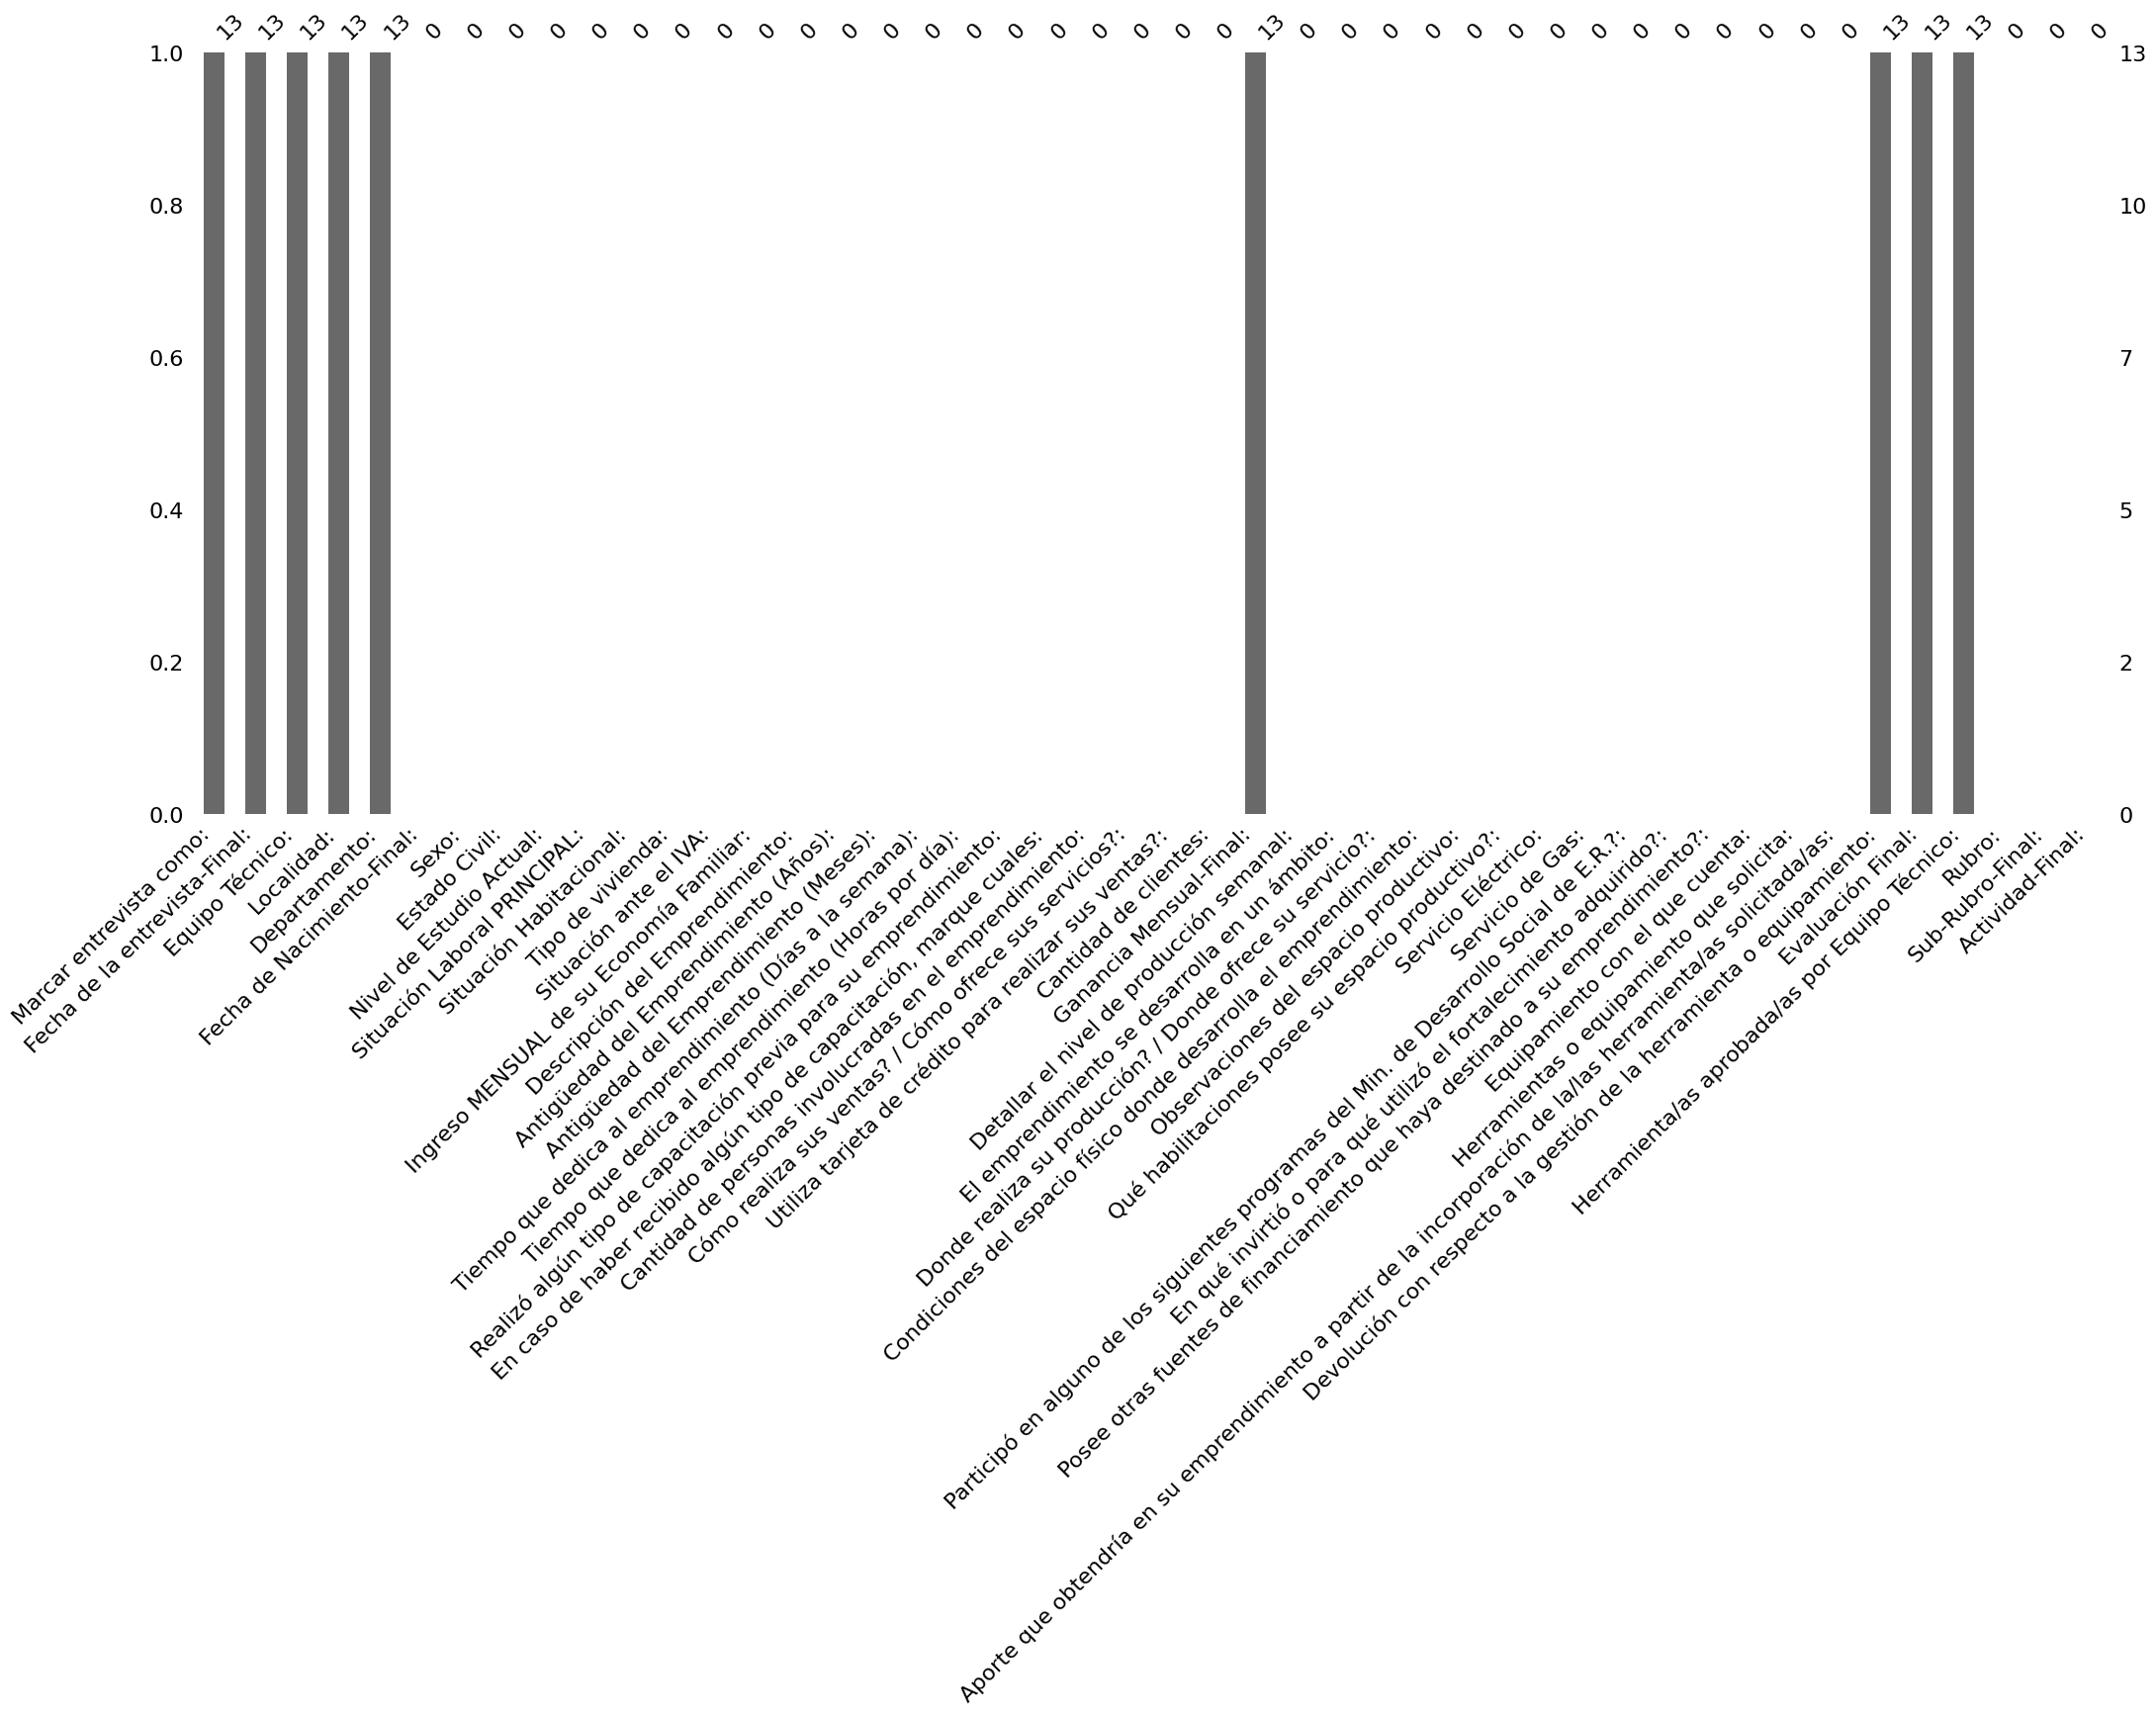

In [66]:
# Seleccionar filas donde alguna de las columnas de la lista tenga valores nulos
filas_con_nulos = df_drop[df_drop[columnas_a_imputar].isnull().any(axis=1)]

# Mostrar las filas con nulos
print(filas_con_nulos.shape)
# Visualiza los valores nulos con una gráfica de barras
msno.bar(filas_con_nulos)

In [67]:
filas_con_nulos

,Marcar entrevista como:,Fecha de la entrevista-Final:,Equipo Técnico:,Localidad:,Departamento:,Fecha de Nacimiento-Final:,Sexo:,Estado Civil:,Nivel de Estudio Actual:,Situación Laboral PRINCIPAL:,Situación Habitacional:,Tipo de vivienda:,Situación ante el IVA:,Ingreso MENSUAL de su Economía Familiar:,Descripción del Emprendimiento:,Antigüedad del Emprendimiento (Años):,Antigüedad del Emprendimiento (Meses):,Tiempo que dedica al emprendimiento (Días a la semana):,Tiempo que dedica al emprendimiento (Horas por día):,Realizó algún tipo de capacitación previa para su emprendimiento:,"En caso de haber recibido algún tipo de capacitación, marque cuales:",Cantidad de personas involucradas en el emprendimiento:,Cómo realiza sus ventas? / Cómo ofrece sus servicios?:,Utiliza tarjeta de crédito para realizar sus ventas?:,Cantidad de clientes:,Ganancia Mensual-Final:,Detallar el nivel de producción semanal:,El emprendimiento se desarrolla en un ámbito:,Donde realiza su producción? / Donde ofrece su servicio?:,Condiciones del espacio físico donde desarrolla el emprendimiento:,Observaciones del espacio productivo:,Qué habilitaciones posee su espacio productivo?:,Servicio Eléctrico:,Servicio de Gas:,Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:,En qué invirtió o para qué utilizó el fortalecimiento adquirido?:,Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:,Equipamiento con el que cuenta:,Herramientas o equipamiento que solicita:,Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as:,Devolución con respecto a la gestión de la herramienta o equipamiento:,Evaluación Final:,Herramienta/as aprobada/as por Equipo Técnico:,Rubro:,Sub-Rubro-Final:,Actividad-Final:
79,El emprendedor no se encontraba en el Domicilio.,2016-06-03 00:00:00,Gisela,La Paz,La Paz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No aprobado,El equipo técnico no aprueba el otorgamiento d...,----,NaN,NaN,NaN
242,El emprendedor no cumplía con los requisitos d...,2016-07-27 00:00:00,Ricardo,Concepción del Uruguay,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No aprobado,El emprendedor actualmente se encuentra desemp...,Ninguna,NaN,NaN,NaN
243,El emprendedor no estaba interesado en el prog...,2016-06-15 00:00:00,Ricardo,San Salvador,San Salvador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No aprobado,La emprendedora solicitó suministros que no co...,Ninguna.,NaN,NaN,NaN
267,El emprendedor no estaba interesado en el prog...,2016-08-29 00:00:00,Priscila,Concordia,Concordia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aprobado - El emprendedor rechazó el fortaleci...,Al momento de la entrevista la emprendedora no...,Horno Electrico,NaN,NaN,NaN
409,El emprendedor no estaba interesado en el prog...,2016-10-14 00:00:00,Rodrigo,Victoria,Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aprobado - El emprendedor rechazó el fortaleci...,El emprendedor fue convocado para participar e...,Se había aprobado su solicitud por un torno p...,NaN,NaN,NaN
411,El emprendedor no estaba interesado en el prog...,2016-09-23 00:00:00,Rodrigo,Paraná,Paraná,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aprobado - El emprendedor rechazó el fortaleci...,Se visitó al emprendedor pero nunca trajo la d...,Herramientas varias para tapicería.,NaN,NaN,NaN
721,El emprendedor no cumplía con los requisitos d...,2017-11-17 00:00:00,Rodr

In [68]:
# Ver los valores únicos de la columna "Marcar entrevista como:"
valores_unicos = filas_con_nulos["Marcar entrevista como:"].value_counts()

# Mostrar los resultados
print(valores_unicos)

Marcar entrevista como:
El emprendedor no cumplía con los requisitos del programa.    7
El emprendedor no estaba interesado en el programa.           5
El emprendedor no se encontraba en el Domicilio.              1
Name: count, dtype: int64


El siguiente paso será, eliminar las filas que corresponden a las situaciones en las que la entrevista no pudo realizarse por razones que no están relacionadas directamente con el emprendimiento, sino más bien por situaciones excepcionales como:

- El emprendedor no cumplía con los requisitos del programa
- El emprendedor no estaba interesado en participar
- El emprendedore no se encontraba en el domicilio.

Para hacerlo, definí una lista con estos valores específicos y luego apliqué un filtro para eliminar todas las filas que contenían dichos valores en la columna "Marcar entrevista como:". Esto me permitió reducir el dataset a solo los casos en los que la entrevista se realizó o que las razones de no realización fueron más pertinentes al análisis de los emprendedores.

In [69]:
# Definir los valores que quieres eliminar
valores_a_eliminar = [
    "El emprendedor no cumplía con los requisitos del programa.",
    "El emprendedor no estaba interesado en el programa.",
    "El emprendedor no se encontraba en el Domicilio.",
]

# Crear un nuevo dataframe eliminando las filas que contienen esos valores
df_entrevistados = df_drop[~df_drop["Marcar entrevista como:"].isin(valores_a_eliminar)]

# Verificar el resultado
print(df_entrevistados.shape)

(1250, 46)


<Axes: >

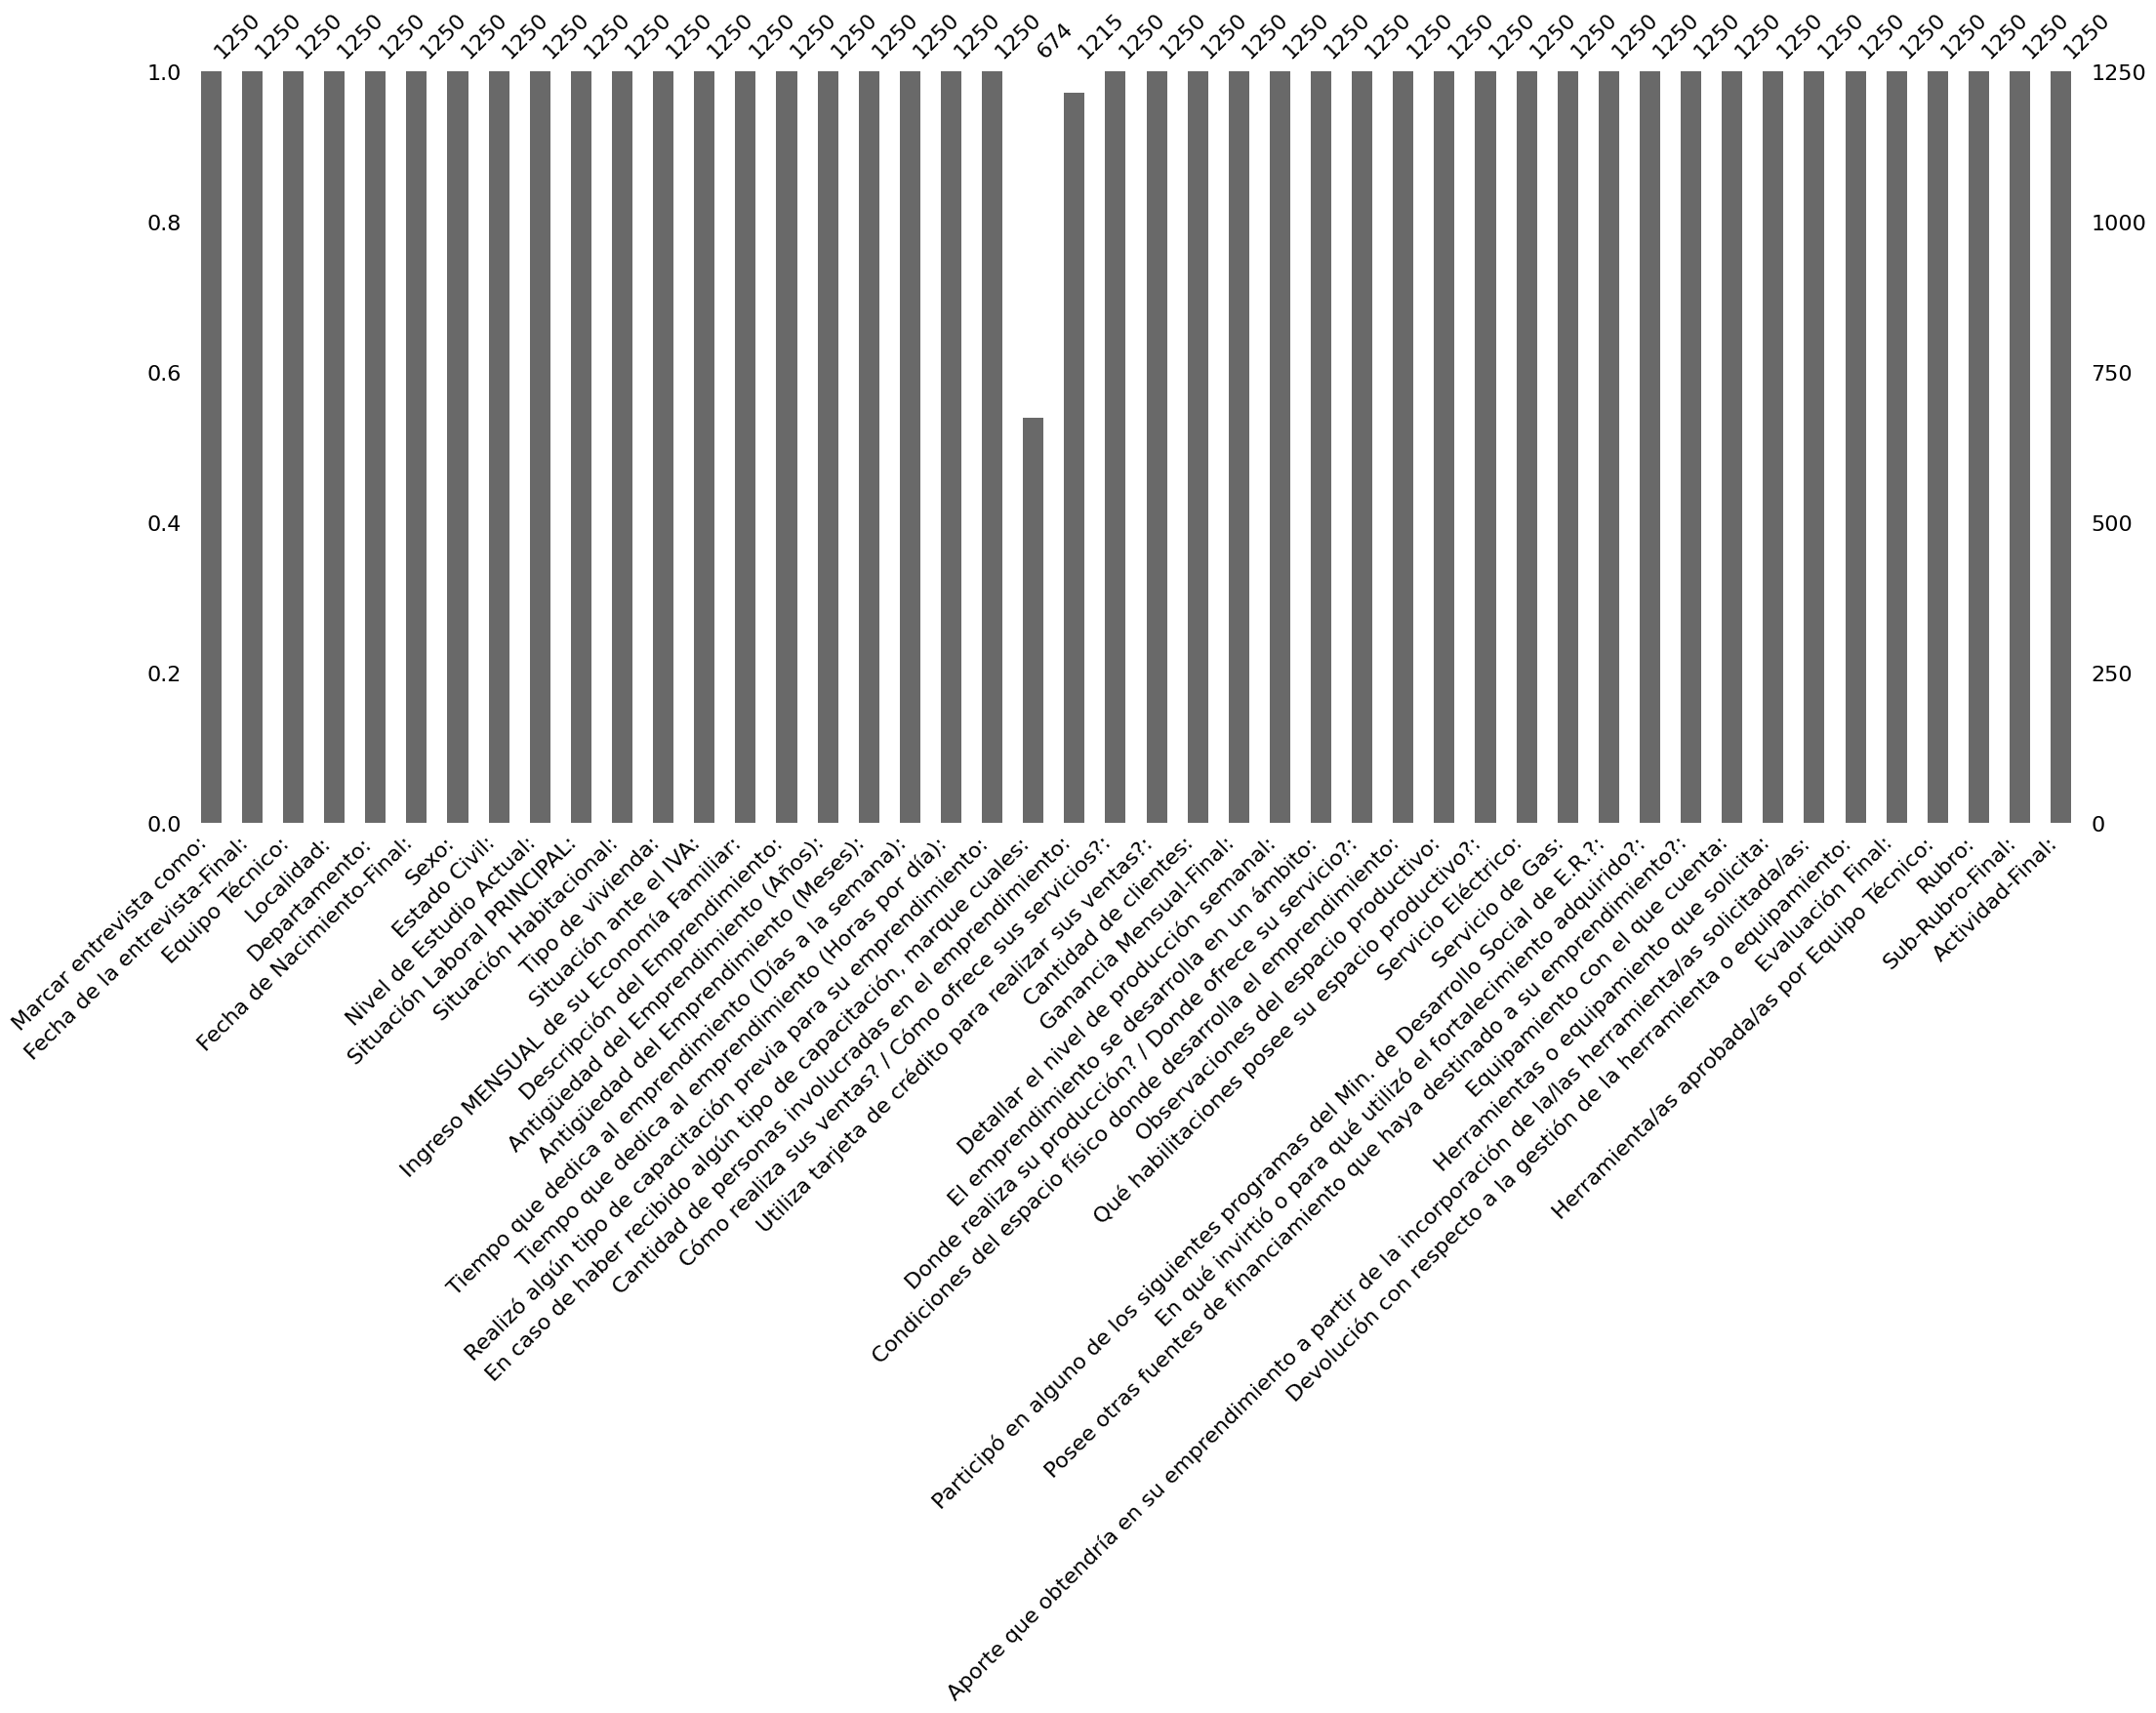

In [70]:
msno.bar(df_entrevistados)

In [71]:
# Verifico los valores únicos de las columna "En caso de haber recibido algún tipo de capacitación, marque cuales:""
capacitacion = df_entrevistados[
    "En caso de haber recibido algún tipo de capacitación, marque cuales:"
].value_counts()
print(capacitacion)

En caso de haber recibido algún tipo de capacitación, marque cuales:
Capacitación en el Oficio                                                                                       493
Capacitación en el Oficio, Capacitación en Costos / Administración, Capacitación en Marketing / Comunicación     40
Capacitación en el Oficio, Capacitación en Costos / Administración                                               30
Capacitación en Costos / Administración, Capacitación en Marketing / Comunicación                                 8
Capacitación en el Oficio, Capacitación en Marketing / Comunicación                                               8
                                                                                                               ... 
Aprendió trabajando en relación de dependencia.                                                                   1
Tecnicatura en Diseño de Indumentaria y Textil.                                                                   1
Cur

In [72]:
# Verifico los valores únicos de la columna "Cantidad de personas involucradas en el emprendimiento:"
personas = df_entrevistados[
    "Cantidad de personas involucradas en el emprendimiento:"
].value_counts()
print(personas)

Cantidad de personas involucradas en el emprendimiento:
Emprendimiento individual                                                            400
Emprendimiento individual.                                                           240
1                                                                                    107
"Emprendimiento individual".                                                          33
2                                                                                     28
                                                                                    ... 
Emprendimiento individual. Eventualmente llama a alguien según el tipo de trabajo      1
Padre, madre y hermano.                                                                1
Trabaja junto a su pareja.                                                             1
Emprendimiento familiar.                                                               1
Emprendimiento grupal. 4 integrantes                  

Luego de eliminar las filas que no aportaban información relevante, procedí a evaluar los valores faltantes en las columnas que todavía tenian nulos. Estas columnas son:

- Caso 1: **(INSIGHT💡)** `En caso de haber recibido algún tipo de capacitación, marque cuales:` Esta columna es relevante para evaluar la capacitación previa de los emprendedores y cómo este valor repercute en su aprobación. Las opciones predefinidas de respuesta incluyen:
    - Capacitación en el Oficio
    - Capacitación en Costos / Administración
    - Capacitación en Marketing / Comunicación
    - No recibió capacitación
    - Otro (Pregunta abierta)

Este último campo abierto para la opción "Otros", es donde los encuestados podían especificar otras formas de capacitación. Este campo contiene una gran cantidad de texto libre que dificulta su análisis e imputación directa. ❌ Decidí eliminar esta columna, ya que el texto libre hace compleja su estandarización y procesamiento. No obstante, para futuros formularios, sería ideal limitar las respuestas a opciones más estructuradas, permitiendo una mayor facilidad para la toma de decisiones y análisis.

Se recomienda estandarizar las respuestas en las siguientes categorías:

* Capacitación en el Oficio
* Capacitación en Costos / Administración
* Capacitación en Marketing / Comunicación
* No recibió capacitación
* Otros (Opcion cerrada)

- Caso 2: **(INSIGHT💡)** `Cantidad de personas involucradas en el emprendimiento:` Esta columna contiene una mezcla de valores categóricos, numéricos y texto libre, lo que dificulta su imputación directa. ❌ Decidí eliminar esta columna, sin embargo, es un dato clave para el análisis y para mejorar futuros formularios. Se recomienda estandarizar las respuestas en las siguientes categorías:
    - Individual: Cuando solo una persona está involucrada en el emprendimiento.
    - Familiar: Cuando participan familiares directos en el emprendimiento.
    - Asociativo o grupal: Cuando participan varias personas de manera asociativa o en equipo.
    - Cooperativa: Para emprendimientos que operan bajo un esquema cooperativo formal.
    - Otro: Para respuestas que no encajan claramente en las categorías anteriores o contienen detalles adicionales específicos.

In [73]:
# Caso 1:
# Eliminar la columna 'En caso de haber recibido algún tipo de capacitación, marque cuales:'
df_entrevistados = df_entrevistados.drop(
    columns=["En caso de haber recibido algún tipo de capacitación, marque cuales:"]
)

In [74]:
# Caso 2:
# Eliminar la columna 'Cantidad de personas involucradas en el emprendimiento'
df_entrevistados = df_entrevistados.drop(
    columns=["Cantidad de personas involucradas en el emprendimiento:"]
)

<Axes: >

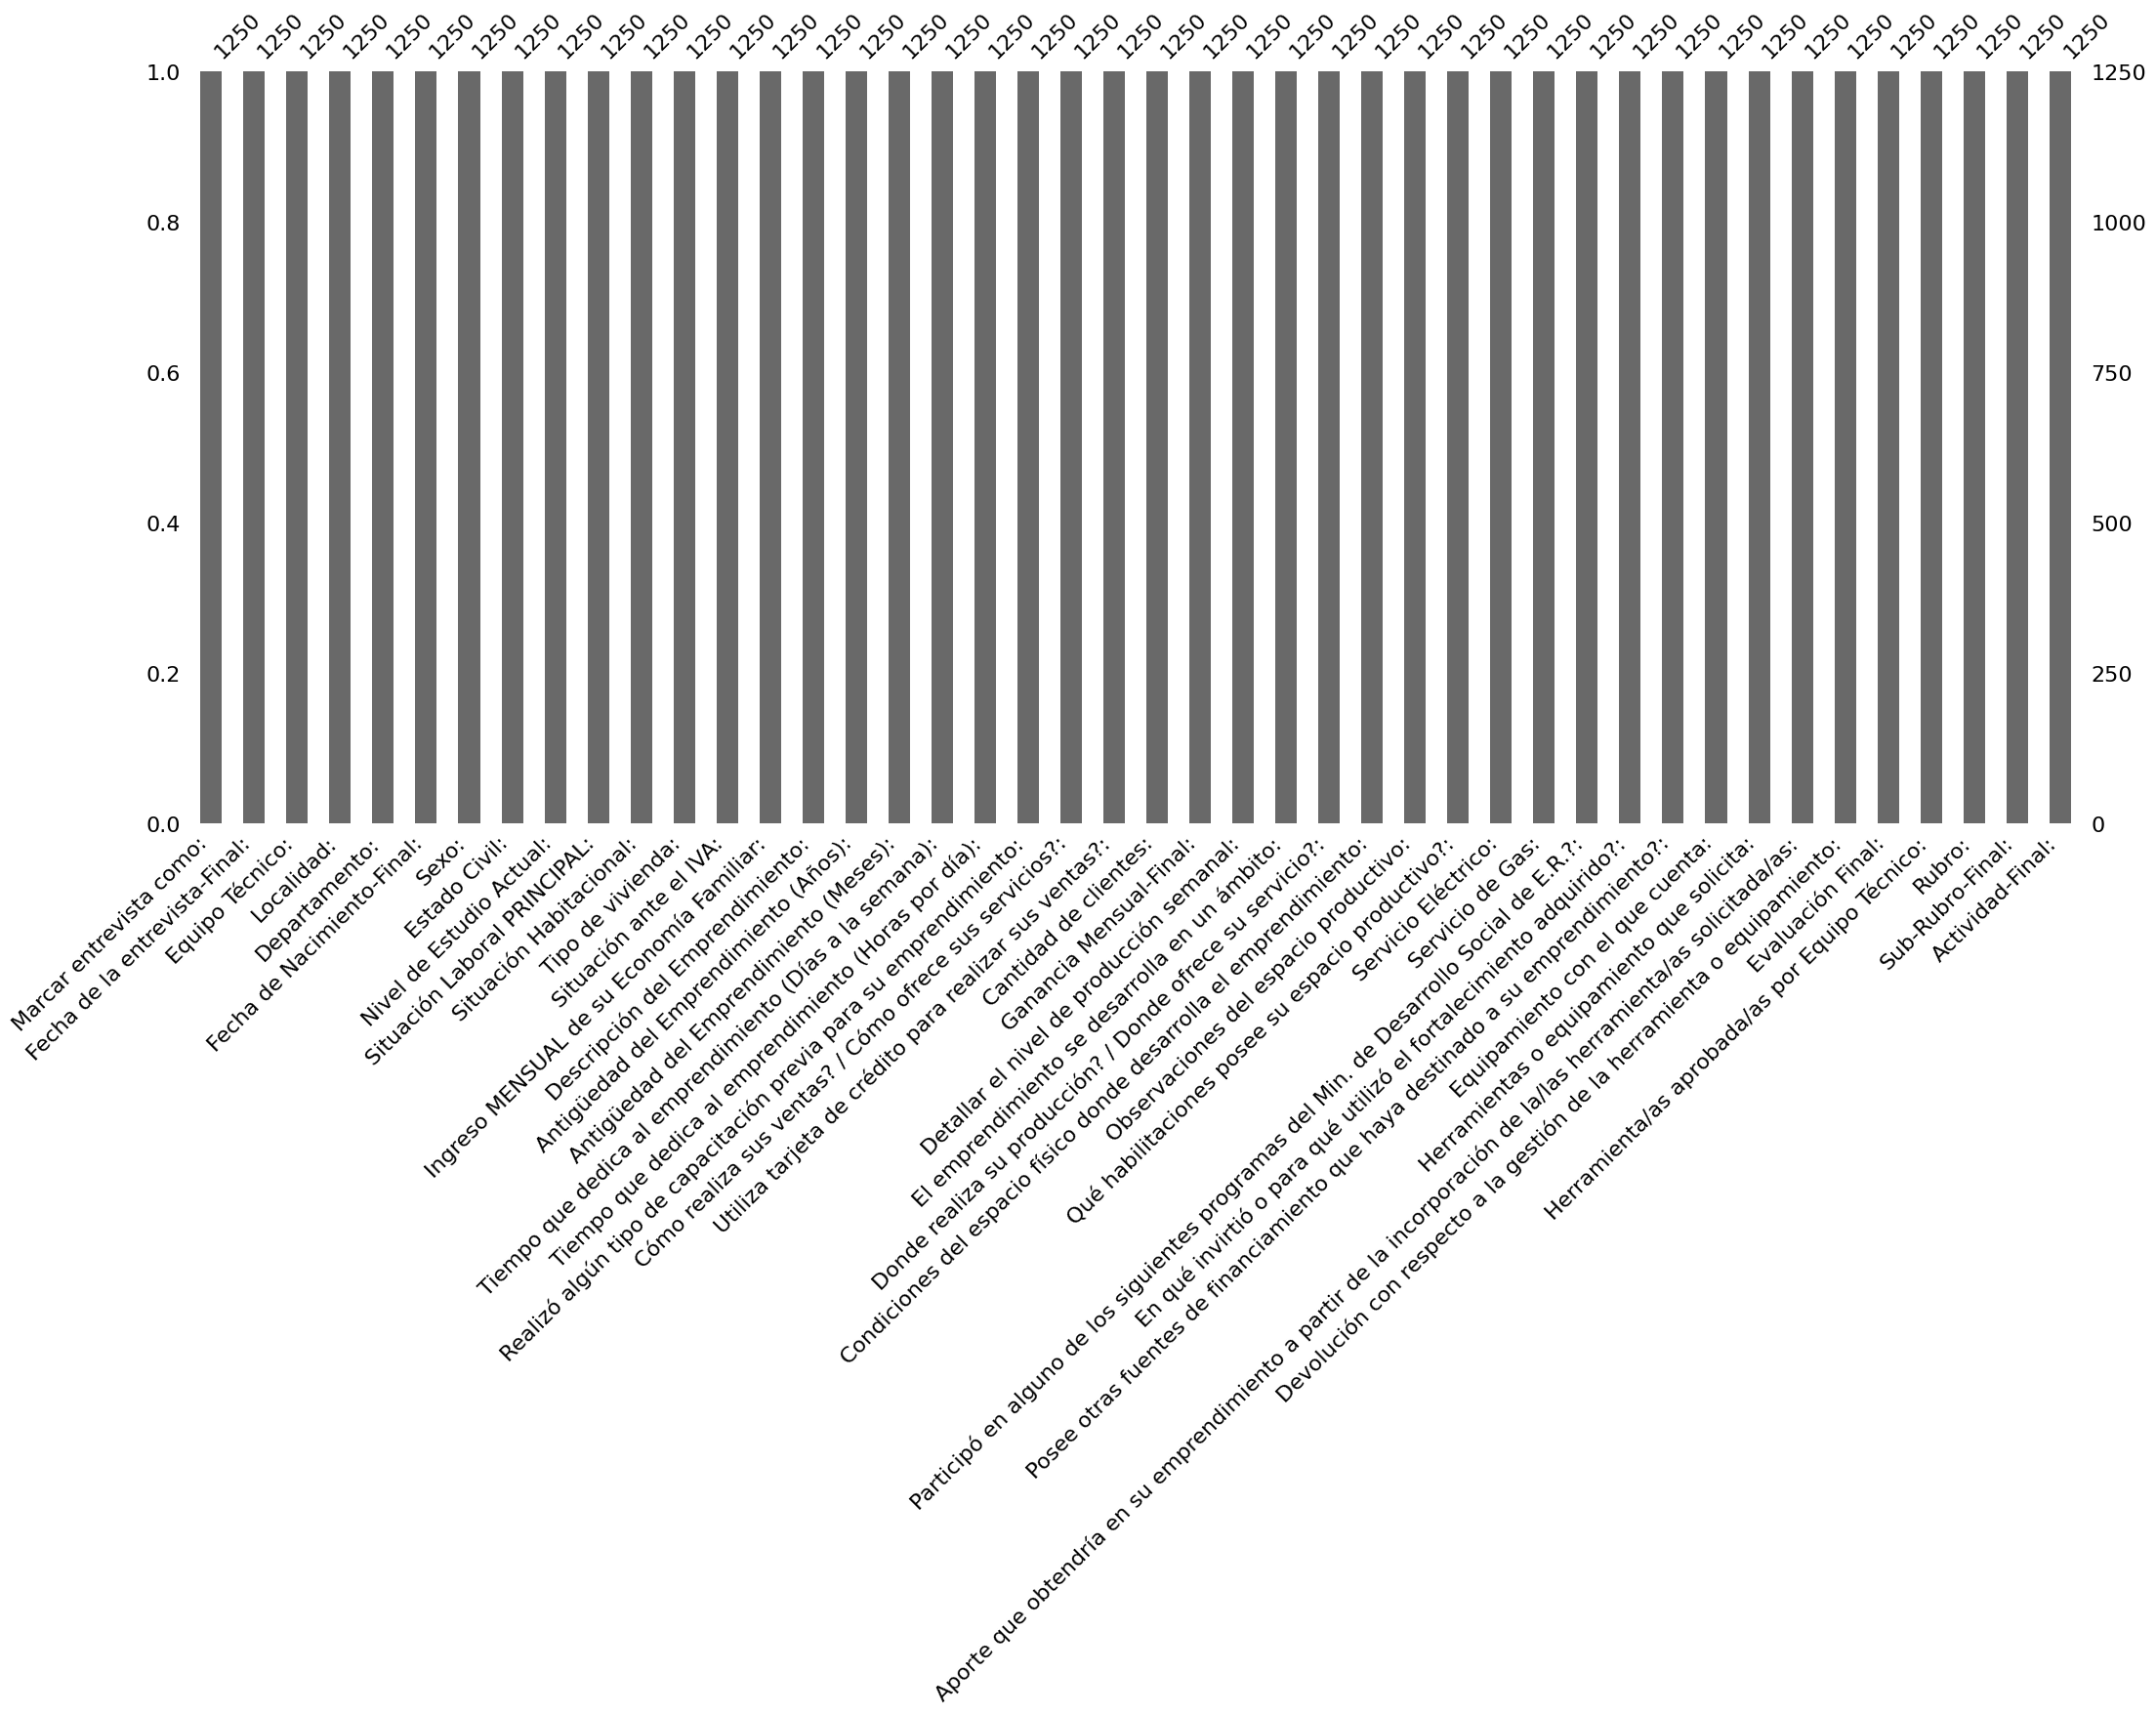

In [75]:
msno.bar(df_entrevistados)

### 📝 Análisis de descripciones textuales extensas:

Las siguientes columnas contienen datos que incluyen observaciones y descripciones de texto libre realizadas por el equipo técnico sobre cada emprendedor entrevistado. Estos textos, que no están categorizados, contienen información valiosa, aunque difícil de procesar en su estado actual. Se procederá a aplicar técnicas de análisis de texto para extraer palabras clave que sean representativas de las observaciones. Con esta información, se podrán generar categorías útiles para la toma de decisiones futuras y optimizar el diseño de formularios de recolección de datos en programas similares.

`Nota:` "Cantidad de personas involucradas en el emprendimiento:" fue eliminada en el paso anterior

In [76]:
# Columnas a analizar:
columnas_a_analizar = [
    "Evaluación Final:",
    "Cantidad de clientes:",
    "Detallar el nivel de producción semanal:",
    "Observaciones del espacio productivo:",
    "En qué invirtió o para qué utilizó el fortalecimiento adquirido?:",
    "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:",
]

**Evaluación Final:** Este dato de texto libre es una justificación de la aprobación o no del trámite donde el profesional se explaya en el porqué considera necesario dar curso o negar la gestión de las herramientas o maquinarias para el emprendedor. Solo evaluaré cuales son las palabras mas comunes con una nube de palabras para generar insigths en el equipo técnico a futuro, pero no utilizaré esta columna para mi análisis ya que lo extenso y variable de los textos hace dificil su categorización y a su vez esto reduciría la riqueza del análisis de los profesionales.

Pasos:
1) Verifico que los valores no sean todos números en la columna. (Ya se que no hay nulos en el df_entrevistados)
2) Limpieza del texto: Elimina los caracteres innecesarios (números, signos de puntuación, etc.) y transforma todo a minúsculas.
3) Tokenización: Divide el texto en palabras.
4) Eliminación de stopwords: Elimina palabras vacías que no aportan significado (preposiciones, artículos, conjunciones, etc.).
5) Generación de una nube de palabras: Visualiza las palabras más comunes para obtener insights.

In [77]:
# Evaluación Final: Paso 1 - Verifico que los valores no sean todos números en la columna.

if df_entrevistados["Evaluación Final:"].apply(lambda x: str(x).isnumeric()).all():
    print(
        "La columna contiene solo números. No es necesario realizar el análisis de texto."
    )
else:
    print(
        "La columna contiene texto o una mezcla de texto y números. Proceder con el análisis."
    )

La columna contiene texto o una mezcla de texto y números. Proceder con el análisis.


In [78]:
# Evaluación Final: Paso 2 - Limpieza del texto usando regex y convirtiendo a minúsculas.


def limpiar_texto(texto):
    texto = re.sub(r"\d+", "", texto)  # Eliminar números
    texto = re.sub(r"[^\w\s]", "", texto)  # Eliminar signos de puntuación
    texto = texto.lower()  # Convertir a minúsculas
    return texto

In [79]:
# Aplicar la limpieza de texto a la columna "Evaluación Final"
df_entrevistados["Evaluación Final:"] = df_entrevistados["Evaluación Final:"].apply(
    lambda x: limpiar_texto(str(x))
)

In [80]:
# Evaluación Final: Pasos 3 y 4 - Tokenización de palabras y eliminación de stopwords.
# Función para tokenizar y eliminar stopwords
def contar_palabras(texto):
    palabras = word_tokenize(texto)  # Tokenizar
    palabras_filtradas = [
        word for word in palabras if word not in stop_words
    ]  # Filtrar stopwords
    return palabras_filtradas

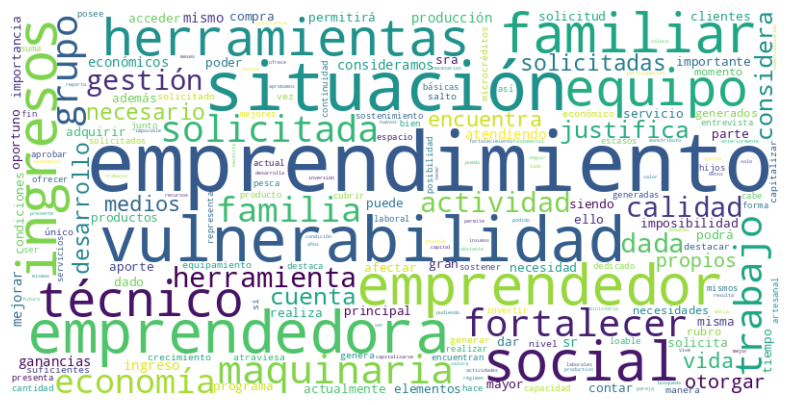

In [81]:
# Aplicar la tokenización y contar las palabras clave
df_entrevistados["tokens"] = df_entrevistados["Evaluación Final:"].apply(
    lambda x: contar_palabras(x)
)

# Generar una lista de todas las palabras de la columna "Evaluación Final"
palabras_evaluacion_final = [
    palabra for sublist in df_entrevistados["tokens"] for palabra in sublist
]

# Contar la frecuencia de las palabras
frecuencia_palabras = Counter(palabras_evaluacion_final)

# Evaluación Final: Paso 5 - Generar la nube de palabras
wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(frecuencia_palabras)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Quitar los ejes
plt.show()

**INSIGHTS💡** para el equipo técnico:

* 🏠 Enfoque en la situación del emprendedor: Palabras como "vulnerabilidad", "situación", "familiar", y "social" indican que muchos de los casos evaluados hacen énfasis en la condición socioeconómica del emprendedor. Esto sugiere que el equipo técnico tiene en cuenta la situación de vulnerabilidad como un factor clave para aprobar o denegar los trámites.

* 🚀 Importancia del emprendimiento: La palabra "emprendimiento" aparece destacada, lo que refleja que el análisis gira en torno a la viabilidad o el impacto del negocio propuesto por el emprendedor. El equipo técnico parece dar peso a la calidad y sostenibilidad del emprendimiento para tomar decisiones.

* 🛠️ Herramientas y maquinaria solicitada: La palabra "herramientas" y "maquinaria" son muy frecuentes, lo que confirma que las solicitudes de equipos o herramientas juegan un papel central en la evaluación. El equipo técnico podría considerar la necesidad de estas herramientas como un factor determinante para la aprobación. Por otro lado sería conveniente estandarizar las herramientas y maquinarias para facilitar el análisis.

* 💰 Enfoque en los ingresos y economía familiar: Palabras como "ingresos", "economía", y "familiar" sugieren que el equipo técnico también valora cómo el emprendimiento puede impactar directamente en la mejora de los ingresos del emprendedor y su entorno familiar. Esto indica un enfoque en el potencial de mejorar la calidad de vida del solicitante.

* 📋 Justificación del equipo técnico: Palabras como "equipo técnico" y "gestión" sugieren que hay un esfuerzo considerable en justificar las decisiones que toman los técnicos. Es probable que el equipo esté utilizando un enfoque basado en criterios que justifiquen formalmente las decisiones, aunque estos sean variados y dependan de cada caso.

* 💪 Enfoque en el fortalecimiento: La palabra "fortalecer" aparece con frecuencia, lo que sugiere que muchos de los casos están orientados a mejorar o consolidar los negocios existentes, más que a arrancar nuevos proyectos. Esto puede reflejar una orientación del programa hacia el fortalecimiento de capacidades existentes.

**Recomendaciones:**
- Estándar en las evaluaciones: Los términos más recurrentes muestran que el equipo técnico tiene patrones de evaluación claros, pero sería útil que se desarrollaran guías más estandarizadas para poder comparar los casos con mayor objetividad, sin perder la riqueza del análisis cualitativo.

- Mayor precisión en las categorías: Palabras como "vulnerabilidad", "familiar" y "social" indican que se evalúan condiciones personales, por lo que quizás valdría la pena categorizar formalmente estos factores en los formularios para reducir la variabilidad en los textos.

- Enfoque en los resultados a largo plazo: Considerando la frecuencia de palabras como "herramientas" y "fortalecer", el equipo técnico puede desarrollar más indicadores que midan cómo estas decisiones realmente impactan el desarrollo de los emprendedores a largo plazo.

**Cantidad de clientes:** Esta columna contiene una mezcla de números, descripciones textuales y detalles sobre los tipos de clientes de los emprendedores, lo que hace su análisis complejo. Algunos registros incluyen datos numéricos como el número de clientes, mientras que otros detallan características de los clientes. Para analizarla, aplicaré técnicas de procesamiento de lenguaje natural (NLP) con el objetivo de extraer las palabras clave más comunes y categorizar la información en grupos útiles. Buscaré los términos más recurrentes para obtener 💡 insights valiosos para el equipo técnico. Sin embargo, debido a la variabilidad y detalle de las descripciones, no utilizaré esta columna directamente para el análisis estadístico principal.

Pasos:
1) Verifico que los valores no sean todos números en la columna. (Ya se que no hay nulos en el df_entrevistados)
2) Limpieza de texto: Eliminaré caracteres innecesarios, signos de puntuación, números y palabras comunes (stopwords) para enfocarme en información relevante.
3) Tokenización: Dividiré el texto en palabras clave para analizar su frecuencia.
4) Análisis de frecuencia: Identificaré las palabras o frases más comunes en las descripciones.
5) Agrupación en categorías: Organizaré los datos en categorías, según las palabras más frecuentes.

In [82]:
# Cantidad de clientes: Paso 1 - Verificar si todos los valores son números en la columna.
if df_entrevistados["Cantidad de clientes:"].apply(lambda x: str(x).isnumeric()).all():
    print("La columna contiene solo números. No se realiza análisis de texto.")
else:
    # Cantidad de clientes: Paso 2 - Limpieza del texto (Usa la misma función limpiar_texto y contar palabras)
    df_entrevistados["Cantidad de clientes:"] = df_entrevistados[
        "Cantidad de clientes:"
    ].apply(lambda x: limpiar_texto(str(x)))

    # Cantidad de clientes: Paso 3 - Tokenizaión (Usa misma función contar palabras)
    df_entrevistados["tokens"] = df_entrevistados["Cantidad de clientes:"].apply(
        lambda x: contar_palabras(x)
    )

    # Cantidad de clientes: Paso 4 - Análisis de frecuencia.
    todas_las_palabras = [
        palabra for sublist in df_entrevistados["tokens"] for palabra in sublist
    ]
    frecuencia_palabras = Counter(todas_las_palabras)

    # Ver las palabras más comunes
    print(frecuencia_palabras.most_common(150))

[('clientes', 1054), ('fijos', 484), ('cuenta', 277), ('emprendedora', 229), ('emprendedor', 207), ('eventuales', 197), ('alrededor', 156), ('posee', 151), ('productos', 139), ('particulares', 124), ('además', 119), ('ocasionalmente', 113), ('reconoce', 95), ('personas', 91), ('demandan', 90), ('cantidad', 76), ('emprendimiento', 76), ('variable', 75), ('aproximadamente', 74), ('aquellos', 73), ('manera', 65), ('diez', 64), ('estima', 62), ('cliente', 60), ('servicio', 58), ('producción', 57), ('sostiene', 54), ('contar', 52), ('clientela', 51), ('adquieren', 49), ('ocasionales', 47), ('tener', 47), ('solicitan', 47), ('número', 45), ('servicios', 45), ('ocasional', 45), ('acopiador', 45), ('ferias', 44), ('comercios', 43), ('semana', 42), ('localidad', 41), ('momento', 40), ('fija', 40), ('si', 38), ('mas', 37), ('venta', 36), ('compran', 36), ('producto', 35), ('dos', 34), ('quince', 34), ('vende', 34), ('locales', 33), ('eventualmente', 33), ('trabajo', 31), ('veinte', 30), ('mensua

**INSIGHTS💡** para el equipo técnico:

Con base en la frecuencia de las palabras clave extraídas de la columna "Cantidad de clientes", se sugiere modificar el formulario a futuro para que capture mejor la información relevante. Aquí están las observaciones y categorías recomendadas:

Observaciones para mejorar el formulario:

- 📊 **Cantidad de clientes**: Es evidente que el número de clientes es un aspecto fundamental. Términos como "fijos", "eventuales", "aproximadamente" junto con números específicos (como "quince", "veinte", "treinta", "cuarenta") indican que la cantidad de clientes es una variable clave. Sería útil que el formulario incluyera una pregunta directa sobre cuántos clientes tiene el emprendedor, con opciones predefinidas basadas en rangos numéricos.
   
- 🧑‍🤝‍🧑 **Tipo de clientes**: Muchos emprendedores mencionan diferentes tipos de clientes, como "fijos", "ocasionales", "particulares", y "comercios". Se sugiere agregar una pregunta que permita clasificar a los clientes según su tipo, lo que facilitaría el análisis de la naturaleza de la clientela (frecuente, esporádica, etc.).

- ⏰ **Frecuencia o regularidad**: La frecuencia de las transacciones es un factor mencionado repetidamente, con términos como "semanales", "mensuales", y "ocasionalmente". Una pregunta en el formulario podría capturar mejor esta información, preguntando con qué regularidad los clientes realizan compras.

- 🛒 **Modo de venta o distribución**: Palabras como "ferias", "locales", "comercialización", y "redes sociales" hacen referencia a los diferentes medios de distribución utilizados por los emprendedores. Agregar opciones específicas para indicar los canales de venta podría ayudar a entender mejor cómo operan los negocios.

**Detallar el nivel de producción semanal:** Esta columna presenta una mezcla de descripciones textuales con detalles sobre la capacidad de producción de los emprendedores, lo que la convierte en una variable clave a la hora de evaluar su viabilidad y capacidad para escalar sus operaciones. Algunas respuestas contienen números específicos de producción semanal, mientras que otras son descripciones más generales o cualitativas sobre la regularidad y el volumen de producción. Dado que la producción es un factor crítico para la aprobación de proyectos en este tipo de programas, aplicaré técnicas de procesamiento de lenguaje natural (NLP) para analizar y categorizar la información de manera estructurada. El objetivo es identificar patrones en la capacidad de producción que puedan 💡 proporcionar insights valiosos para el equipo técnico en el proceso de evaluación. En los casos donde no se pueda categorizar en un orden claro, se agrupará en una categoría de tipo **"variable"**.

### Pasos:
1) **Verificación inicial**: Comprobaré que los valores no sean todos numéricos, ya que algunos registros podrían describir la producción en texto libre.

2) **Limpieza de texto**: Se eliminarán caracteres innecesarios, signos de puntuación, números y palabras comunes (stopwords) para enfocarme en la información relevante.

3) **Tokenización**: Dividiré el texto en palabras clave, permitiendo analizar la frecuencia de los términos más utilizados.

4) **Análisis de frecuencia**: Identificaré las palabras o frases más comunes que describen la capacidad de producción de los emprendedores.

5) **Agrupación en categorías**: A partir de los resultados de la frecuencia, se organizarán los datos en categorías predefinidas, como **"alta producción"**, **"media producción"**, **"baja producción"**, y una categoría **"variable"** para los casos en los que las descripciones no se puedan clasificar en un rango específico. Luego crearé una columna nueva con estas categorías.

In [83]:
# Creo una función para ejecutar los pasos 1 al 4:


def analizar_frecuencia(nombre_columna, num_resultado):
    # Paso 1 - Verificar si todos los valores son números en la columna.
    if df_entrevistados[nombre_columna].apply(lambda x: str(x).isnumeric()).all():
        print("La columna contiene solo números. No se realiza análisis de texto.")
    else:
        # Paso 2 - Limpieza del texto
        df_entrevistados[nombre_columna] = df_entrevistados[nombre_columna].apply(
            lambda x: limpiar_texto(str(x))
        )

        # Paso 3 -  Tokenización
        df_entrevistados["tokens"] = df_entrevistados[nombre_columna].apply(
            lambda x: contar_palabras(x)
        )

        # Paso 4 - Análisis de frecuencia de las palabras clave
        todas_las_palabras = [
            palabra for sublist in df_entrevistados["tokens"] for palabra in sublist
        ]
        frecuencia_palabras = Counter(todas_las_palabras)

        # Ver las palabras más comunes
        print(frecuencia_palabras.most_common(num_resultado))

In [84]:
analizar_frecuencia("Detallar el nivel de producción semanal:", 100)

[('semana', 458), ('producción', 450), ('demanda', 247), ('emprendedora', 230), ('puede', 229), ('nivel', 220), ('kg', 216), ('variable', 205), ('emprendedor', 186), ('semanal', 185), ('semanalmente', 177), ('produce', 151), ('depende', 142), ('alrededor', 136), ('docenas', 119), ('producir', 116), ('realiza', 114), ('encuentra', 108), ('realizar', 106), ('día', 103), ('dos', 94), ('tortas', 94), ('trabajo', 92), ('cantidad', 79), ('trabajos', 78), ('según', 78), ('semanales', 77), ('harina', 75), ('cada', 72), ('pedidos', 71), ('tres', 71), ('aproximadamente', 68), ('servicios', 64), ('ejemplo', 61), ('productos', 60), ('época', 58), ('pizzas', 58), ('panes', 58), ('llegar', 58), ('registre', 55), ('unas', 54), ('dependiendo', 53), ('año', 51), ('empanadas', 49), ('días', 48), ('promedio', 48), ('cuenta', 47), ('condiciones', 46), ('cinco', 43), ('kilos', 43), ('tiempo', 42), ('cuatro', 41), ('varía', 40), ('alcanza', 40), ('complejidad', 40), ('clientes', 38), ('climáticas', 37), ('r

In [85]:
# Detallar el nivel de producción semanal: Paso 5 - Agrupación en categorías.

categorias_produccion = {
    "Muy Bajo": [
        "poco",
        "ocasional",
        "mínimo",
        "lento",
        "esporádico",
        "bajo",
        "pequeño",
        "menor",
        "insuficiente",
        "ocasionalmente",
        "ocasional",
        "eventuales",
        "aún",
        "menos",
        "requieren",
    ],
    "Bajo": [
        "semanal",
        "pequeña",
        "limitado",
        "ocasionales",
        "algunos días",
        "varias veces",
        "aproximadamente",
        "unos pocos",
        "semanales",
        "semana",
        "vez",
        "clientes",
        "fijos",
        "cuenta",
        "tres",
        "cinco",
        "quince",
    ],
    "Intermedio": [
        "moderado",
        "estable",
        "regular",
        "medio",
        "constante",
        "semana",
        "semanales",
        "aproximado",
        "cuatro",
        "veinte",
        "realiza",
        "trabajo",
        "producción",
        "cantidad",
        "clientes",
        "producción",
        "días",
        "productos",
        "servicios",
        "promedio",
    ],
    "Alto": [
        "producción",
        "diaria",
        "fuerte",
        "mucho",
        "importante",
        "gran",
        "sustancial",
        "grandes cantidades",
        "clientes",
        "treinta",
        "cincuenta",
        "ventas",
        "ventas",
        "demanda",
        "alta",
        "semanales",
        "clientes",
        "mayor",
        "servicios",
        "grandes",
    ],
    "Muy Alto": [
        "diariamente",
        "constante",
        "enorme",
        "masivo",
        "siempre",
        "muchísimo",
        "altísimo",
        "alta producción",
        "constantemente",
        "grandes volúmenes",
        "todos",
        "altas demandas",
        "cuarenta",
        "mucho",
        "clientes",
        "servicios",
        "producción",
    ],
    "Variable": [
        "variable",
        "depende",
        "según",
        "temporada",
        "época",
        "clima",
        "demandas",
        "condiciones",
        "varía",
        "cambia",
        "complejidad",
        "circunstancias",
        "tiempo",
        "según",
        "puede",
        "función",
        "pedido",
        "eventual",
        "demanda",
        "ventas",
        "época",
    ],
    "Indefinido": [
        "no especifica",
        "no se sabe",
        "sin datos",
        "indefinido",
        "incapaz",
        "desconocido",
        "no aplica",
        "no define",
        "sin",
        "no hay información",
        "desconocida",
    ],
}

In [86]:
# Función para categorizar ingresando textos de cada celda y las categorías posibles
def categorizar(texto, categorias):
    # Convertimos el texto a minúsculas para un análisis consistente
    texto = texto.lower()

    # Diccionario para contar las palabras asociadas a cada categoría
    contador_categorias = {categoria: 0 for categoria in categorias.keys()}

    # Contar las palabras clave asociadas a cada categoría
    for categoria, palabras_clave in categorias.items():
        for palabra in palabras_clave:
            if palabra in texto:
                contador_categorias[categoria] += 1

    # Encontrar la categoría con más palabras clave asociadas
    categoria_asignada = max(contador_categorias, key=contador_categorias.get)

    # Si hay empate, asignar "Variable"
    max_count = max(contador_categorias.values())
    categorias_maximas = [
        cat for cat, count in contador_categorias.items() if count == max_count
    ]

    if len(categorias_maximas) > 1:
        return "Variable"
    elif max_count == 0:  # Si no hay coincidencias
        return "Indefinido"
    else:
        return categoria_asignada

In [87]:
# Paso 5 - Aplicar la categorización a la columna "Detallar el nivel de producción semanal"
df_entrevistados["Producción semanal"] = df_entrevistados[
    "Detallar el nivel de producción semanal:"
].apply(lambda x: categorizar(x, categorias_produccion))

# Ver las primeras filas con las categorías asignadas
print(
    df_entrevistados[
        ["Detallar el nivel de producción semanal:", "Producción semanal"]
    ].head(5)
)

            Detallar el nivel de producción semanal: Producción semanal
0                                    a  kg de harina           Variable
1  alrededor de diez trabajos por semana dependie...         Intermedio
2  realiza trabajo en serie y por semana logra pr...         Intermedio
3      por cada día de trabajo utiliza  kg de harina           Variable
4  por día amasa ks de masa con ella realiza siet...         Intermedio


In [88]:
# Eliminar la columna "Detallar el nivel de producción semanal:"
df_entrevistados = df_entrevistados.drop(
    columns=["Detallar el nivel de producción semanal:"]
)

df_entrevistados.head(2)

,Marcar entrevista como:,Fecha de la entrevista-Final:,Equipo Técnico:,Localidad:,Departamento:,Fecha de Nacimiento-Final:,Sexo:,Estado Civil:,Nivel de Estudio Actual:,Situación Laboral PRINCIPAL:,Situación Habitacional:,Tipo de vivienda:,Situación ante el IVA:,Ingreso MENSUAL de su Economía Familiar:,Descripción del Emprendimiento:,Antigüedad del Emprendimiento (Años):,Antigüedad del Emprendimiento (Meses):,Tiempo que dedica al emprendimiento (Días a la semana):,Tiempo que dedica al emprendimiento (Horas por día):,Realizó algún tipo de capacitación previa para su emprendimiento:,Cómo realiza sus ventas? / Cómo ofrece sus servicios?:,Utiliza tarjeta de crédito para realizar sus ventas?:,Cantidad de clientes:,Ganancia Mensual-Final:,El emprendimiento se desarrolla en un ámbito:,Donde realiza su producción? / Donde ofrece su servicio?:,Condiciones del espacio físico donde desarrolla el emprendimiento:,Observaciones del espacio productivo:,Qué habilitaciones posee su espacio productivo?:,Servicio Eléctrico:,Servicio de Gas:,Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:,En qué invirtió o para qué utilizó el fortalecimiento adquirido?:,Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:,Equipamiento con el que cuenta:,Herramientas o equipamiento que solicita:,Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as:,Devolución con respecto a la gestión de la herramienta o equipamiento:,Evaluación Final:,Herramienta/as aprobada/as por Equipo Técnico:,Rubro:,Sub-Rubro-Final:,Actividad-Final:,tokens,Producción semanal
0,La entrevista se realizó correctamente.,2016-03-17 00:00:00,Gisela,Gualeguaychú,Gualeguaychú,1971-02-09 00:00:00,Femenino,Casada/o,Secundario Completo,Autoempleado,Vivienda Alquilada,TIPO B,Monotributo Social,6000.0,"Pre pizzas, pasta frolas, cremonas, pan sabori...",12.0,0.0,48.0,0.0,SI,"Tiene un puesto fijo en una Feria., Coordina l...",NO,,1500,Urbano,En su casa. (No posee un espacio destinado al ...,Regular.,"Muy chico. 3 x 5 m. Techo cieloraso, piso cera...",Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,Insumos- Elementos de Cocina,No,"Horno 6 moldes pizzero, Heladera familiar, bat...",Amasadora y sobadora de mesa,Para agregar otros productos con hojaldre y ag...,Aprobado,se considera necesario otorgar la maquinaria s...,Amasadora y Sobadora,Producción,PANIFICACIÓN,Pastelería,"[kg, harina]",Variable
1,La entrevista se realizó correctamente.,2016-03-18 00:00:00,Rodrigo,Victoria,Victoria,1971-02-10 00:00:00,Masculino,Casada/o,Secundario Incompleto,Empleado,Vivienda Propia,Tipo A,No se encuentra inscripto,8000.0,Claudio lleva adelante un emprendimiento dedic...,5.0,6.0,6.0,5.0,SI,La gente lo conoce y va a su domicilio o lo llama,NO,posee alrededor de cuarenta clientes fijos y u...,3500,Urbano,En su casa. (Posee un espacio separado destina...,Bueno.,El emprendedor practica su emprendimiento en e...,Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,Utilizó el financiamiento para la compra de he...,No posee otras fuentes de financiamiento.,"Moto-esmeriladora de banco, cargador de baterí...",Soldadora autógena.,El emprendedor utilizará esta herramientas par...,Aprobado,como equipo técnico consideramos relevante apo...,Soldadora Autógena,Servicios generales,Servicio mecánico,Mecánica del automotor,"[alrededor, diez, trabajos, semana, dependiend...",Intermedio


Resultado:

- **Categorías y palabras clave**: Se definieron palabras clave específicas asociadas a cada categoría, muchas de las cuales provienen de la lista de términos más frecuentes en la columna analizada.

- **Proceso de asignación**: El código cuenta cuántas palabras de cada categoría aparecen en el texto, y la categoría con más coincidencias es la que se asigna.

- **Variable en caso de empate**: Si el texto contiene palabras que coinciden con múltiples categorías, se asigna la categoría "Variable" para reflejar la naturaleza ambigua o cambiante de la producción.

- **Indefinido**: Si no se encuentra ninguna palabra relevante en el texto, se asigna la categoría "Indefinido".

**INSIGHT💡:** De esta forma, la columna "Detallar el nivel de producción semanal" se ha categorizado en un máximo de 7 categorías útiles para el análisis posterior, proporcionando una estructura más clara para la interpretación de los datos. A futuro se recomienda utilzar estas categorías para simplificar el análisis de cada solicitud.

**Donde compra la materia prima?:** Esta columna proporciona información sobre los lugares y métodos de adquisición de materia prima por parte de los emprendedores, lo que resulta fundamental para evaluar la sostenibilidad y las fuentes de abastecimiento de los proyectos. Las respuestas varían desde descripciones específicas de proveedores o comercios locales hasta métodos más generales, como ferias o mercados. Dado que la procedencia de la materia prima puede ser un factor clave para la viabilidad de los proyectos, aplicaré técnicas de procesamiento de lenguaje natural (NLP) para analizar y categorizar la información de manera estructurada. El objetivo es identificar patrones en los canales de compra que puedan 💡 proporcionar insights valiosos para el equipo técnico en el proceso de evaluación.

### Pasos:
1) **Verificación inicial**: Comprobaré que los valores no sean todos numéricos, ya que algunos registros podrían contener nombres de lugares o descripciones textuales.

2) **Limpieza de texto**: Se eliminarán caracteres innecesarios, signos de puntuación, números y palabras comunes (stopwords) para enfocarme en la información relevante.

3) **Tokenización**: Dividiré el texto en palabras clave, permitiendo analizar la frecuencia de los términos más utilizados.

4) **Análisis de frecuencia**: Identificaré las palabras o frases más comunes que describen los lugares y métodos de adquisición de la materia prima.

5) **Agrupación en categorías**: A partir de los resultados de la frecuencia, se organizarán los datos en categorías predefinidas.

**Observaciones del espacio productivo:** Esta columna ofrece información detallada sobre las condiciones del espacio físico donde los emprendedores desarrollan sus actividades productivas. Las respuestas varían entre descripciones específicas sobre las dimensiones, materiales de construcción, y estado de los espacios, hasta observaciones sobre el nivel de adecuación de estos entornos para las necesidades productivas. Dado que el espacio productivo influye directamente en la capacidad operativa y sostenibilidad de los emprendimientos, aplicaré técnicas de procesamiento de lenguaje natural (NLP) para analizar y categorizar esta información de manera estructurada. El objetivo es identificar patrones en las características del espacio que puedan 💡 proporcionar insights valiosos para el equipo técnico en el proceso de evaluación, y ayudar a determinar si el espacio cumple con las condiciones necesarias para el éxito del proyecto.

Pasos:
1) **Verificación inicial**: Comprobaré que los valores no sean exclusivamente numéricos, ya que algunos registros podrían contener descripciones textuales sobre el espacio.

2) **Limpieza de texto**: Se eliminarán caracteres innecesarios, signos de puntuación, números y palabras comunes (stopwords) para enfocar el análisis en la información relevante.

3) **Tokenización**: Dividiré el texto en palabras clave, permitiendo analizar la frecuencia de los términos más utilizados.

4) **Análisis de frecuencia**: Identificaré las palabras o frases más comunes que describen el estado del espacio productivo y las condiciones del entorno en el que se desempeña el emprendedor.

5) **Agrupación en categorías**: A partir de los resultados de la frecuencia, se organizarán los datos en categorías predefinidas, como **"óptimo"**, **"deficiente"**, **"regular"**, o **"trabaja a domicilio"**, además de una categoría **"variable"** para los casos donde las descripciones no se puedan clasificar en un rango específico.


In [89]:
# Pasos 1-4:
analizar_frecuencia("Observaciones del espacio productivo:", 100)

[('espacio', 948), ('producción', 359), ('metros', 314), ('emprendedora', 291), ('condiciones', 273), ('cocina', 273), ('piso', 254), ('vivienda', 250), ('emprendedor', 249), ('casa', 249), ('x', 234), ('familiar', 232), ('paredes', 230), ('cuenta', 227), ('encuentra', 204), ('techo', 189), ('emprendimiento', 170), ('trabaja', 170), ('productivo', 161), ('posee', 140), ('realiza', 134), ('trabajo', 131), ('mismo', 130), ('m', 116), ('revocadas', 114), ('domicilio', 102), ('comedor', 102), ('dimensiones', 101), ('cemento', 96), ('pudo', 96), ('utiliza', 95), ('produce', 93), ('buenas', 84), ('lugar', 84), ('chapa', 82), ('cerámicos', 81), ('habitación', 80), ('verificar', 79), ('pintadas', 77), ('producir', 74), ('actividad', 72), ('herramientas', 71), ('local', 69), ('desarrolla', 63), ('bien', 61), ('cuadrados', 61), ('mts', 61), ('allí', 59), ('encuentran', 58), ('instalaciones', 55), ('cielo', 54), ('pequeño', 53), ('galpón', 53), ('parte', 52), ('si', 52), ('momento', 49), ('produc

In [90]:
# Paso 5 - Defino las categorías para el espacio productivo
categorias_espacio = {
    "No Observado": [
        "no se pudo",
        "no especifica",
        "no se sabe",
        "sin datos",
        "verificar",
        "incapaz",
        "no define",
    ],
    "Trabajo a Domicilio": [
        "domicilio",
        "vivienda",
        "casa del cliente",
        "cliente",
        "viaja",
    ],
    "Deficiente": [
        "precarias",
        "inseguras",
        "malas",
        "deteriorado",
        "inadecuado",
        "pequeño",
        "incompleto",
        "cemento",
        "techo",
        "chapa",
        "tierra",
        "sin",
    ],
    "Regular": [
        "regular",
        "moderado",
        "adecuado",
        "estable",
        "despintado",
        "despintadas",
    ],
    "Óptimo": [
        "óptimo",
        "bueno",
        "buenas condiciones",
        "perfecto",
        "excelente",
        "cerámicos",
        "bien",
        "pintadas",
        "buenas",
    ],
    "Producción Elevada": [
        "alta producción",
        "alto",
        "alto nivel",
        "grandes cantidades",
        "taller",
        "producir",
        "productos",
    ],
    "Producción Baja": [
        "bajo",
        "poco",
        "lento",
        "insuficiente",
        "trabajo limitado",
        "produce poco",
        "pequeño",
    ],
    "Indefinido": [
        "indefinido",
        "sin",
        "desconocido",
        "no aplica",
        "no especifica",
        "sin datos",
        "incapaz",
    ],
}

**INSIGHT 💡:** Las categorías: No observado, Trabaja a domicilio, Deficiente, Regular, Indefinido, Producción elevada y Producción baja podrían ser utilizadas en formularios futuros como otra manera de puntuar el emprendimiento.

In [91]:
# Aplicar la categorización a la columna "Observaciones del espacio productivo:"
df_entrevistados["Espacio productivo"] = df_entrevistados[
    "Observaciones del espacio productivo:"
].apply(lambda x: categorizar(x, categorias_espacio))

# Ver las primeras filas con las categorías asignadas
print(
    df_entrevistados[
        ["Observaciones del espacio productivo:", "Espacio productivo"]
    ].head(10)
)

               Observaciones del espacio productivo:   Espacio productivo
0      muy chico  x  m techo cieloraso piso ceramica           Deficiente
1  el emprendedor practica su emprendimiento en e...  Trabajo a Domicilio
2  es el living de la vivienda en buenas condicio...               Óptimo
3  el espacio físico es de unos  x  metros parede...           Deficiente
4  para desempeñarse posee una habitación que gen...               Óptimo
5  posee un espacio de dimensiones considerables ...           Deficiente
6  habitación de  x  metros con salida amplia e i...             Variable
7  en función del nivel de producción y tareas qu...             Variable
8  de dimensiones amplias azulejado y piso de porlan             Variable
9  el espacio de producción es en la parte delant...  Trabajo a Domicilio


In [92]:
# Eliminar la columna "Observaciones del espacio productivo:" ya que no se necesita y no aporta valor
df_entrevistados = df_entrevistados.drop(
    columns=["Observaciones del espacio productivo:"]
)

df_entrevistados.head(2)

,Marcar entrevista como:,Fecha de la entrevista-Final:,Equipo Técnico:,Localidad:,Departamento:,Fecha de Nacimiento-Final:,Sexo:,Estado Civil:,Nivel de Estudio Actual:,Situación Laboral PRINCIPAL:,Situación Habitacional:,Tipo de vivienda:,Situación ante el IVA:,Ingreso MENSUAL de su Economía Familiar:,Descripción del Emprendimiento:,Antigüedad del Emprendimiento (Años):,Antigüedad del Emprendimiento (Meses):,Tiempo que dedica al emprendimiento (Días a la semana):,Tiempo que dedica al emprendimiento (Horas por día):,Realizó algún tipo de capacitación previa para su emprendimiento:,Cómo realiza sus ventas? / Cómo ofrece sus servicios?:,Utiliza tarjeta de crédito para realizar sus ventas?:,Cantidad de clientes:,Ganancia Mensual-Final:,El emprendimiento se desarrolla en un ámbito:,Donde realiza su producción? / Donde ofrece su servicio?:,Condiciones del espacio físico donde desarrolla el emprendimiento:,Qué habilitaciones posee su espacio productivo?:,Servicio Eléctrico:,Servicio de Gas:,Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:,En qué invirtió o para qué utilizó el fortalecimiento adquirido?:,Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:,Equipamiento con el que cuenta:,Herramientas o equipamiento que solicita:,Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as:,Devolución con respecto a la gestión de la herramienta o equipamiento:,Evaluación Final:,Herramienta/as aprobada/as por Equipo Técnico:,Rubro:,Sub-Rubro-Final:,Actividad-Final:,tokens,Producción semanal,Espacio productivo
0,La entrevista se realizó correctamente.,2016-03-17 00:00:00,Gisela,Gualeguaychú,Gualeguaychú,1971-02-09 00:00:00,Femenino,Casada/o,Secundario Completo,Autoempleado,Vivienda Alquilada,TIPO B,Monotributo Social,6000.0,"Pre pizzas, pasta frolas, cremonas, pan sabori...",12.0,0.0,48.0,0.0,SI,"Tiene un puesto fijo en una Feria., Coordina l...",NO,,1500,Urbano,En su casa. (No posee un espacio destinado al ...,Regular.,Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,Insumos- Elementos de Cocina,No,"Horno 6 moldes pizzero, Heladera familiar, bat...",Amasadora y sobadora de mesa,Para agregar otros productos con hojaldre y ag...,Aprobado,se considera necesario otorgar la maquinaria s...,Amasadora y Sobadora,Producción,PANIFICACIÓN,Pastelería,"[chico, x, m, techo, cieloraso, piso, ceramica]",Variable,Deficiente
1,La entrevista se realizó correctamente.,2016-03-18 00:00:00,Rodrigo,Victoria,Victoria,1971-02-10 00:00:00,Masculino,Casada/o,Secundario Incompleto,Empleado,Vivienda Propia,Tipo A,No se encuentra inscripto,8000.0,Claudio lleva adelante un emprendimiento dedic...,5.0,6.0,6.0,5.0,SI,La gente lo conoce y va a su domicilio o lo llama,NO,posee alrededor de cuarenta clientes fijos y u...,3500,Urbano,En su casa. (Posee un espacio separado destina...,Bueno.,Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,Utilizó el financiamiento para la compra de he...,No posee otras fuentes de financiamiento.,"Moto-esmeriladora de banco, cargador de baterí...",Soldadora autógena.,El emprendedor utilizará esta herramientas par...,Aprobado,como equipo técnico consideramos relevante apo...,Soldadora Autógena,Servicios generales,Servicio mecánico,Mecánica del automotor,"[emprendedor, practica, emprendimiento, fondo,...",Intermedio,Trabajo a Domicilio


**En qué invirtió o para qué utilizó el fortalecimiento adquirido?:** Esta columna describe cómo los emprendedores han invertido el financiamiento o fortalecimiento recibido, ya sea en insumos, herramientas, equipamiento, o mejoras en su espacio productivo. Algunas respuestas proporcionan detalles específicos sobre los productos comprados, mientras que otras se limitan a descripciones generales. Dado que el destino del fortalecimiento financiero es clave para evaluar la sustentabilidad y capacidad de los proyectos, aplicaré técnicas de procesamiento de lenguaje natural (NLP) para analizar y categorizar la información de manera estructurada. El objetivo es identificar patrones en las inversiones realizadas por los emprendedores que puedan 💡 proporcionar insights valiosos para el equipo técnico durante el proceso de evaluación.

Pasos:

1) **Verificación inicial**: Comprobaré que los valores no sean exclusivamente numéricos, ya que algunos registros pueden contener descripciones textuales sobre la inversión realizada.

2) **Limpieza de texto**: Se eliminarán caracteres innecesarios, signos de puntuación, números y palabras comunes (stopwords) para centrar el análisis en la información relevante.

3) **Tokenización**: Dividiré el texto en palabras clave, permitiendo analizar la frecuencia de los términos más utilizados.

4) **Análisis de frecuencia**: Identificaré las palabras o frases más comunes que describen los tipos de inversión realizados por los emprendedores.

5) **Agrupación en categorías**: A partir de los resultados de la frecuencia, se organizarán los datos en categorías predefinidas, como **"insumos"**, **"herramientas"**, **"equipamiento"**, y una categoría **"no ha recibido fortalecimiento"** para aquellos casos en los que no se ha otorgado financiamiento.

In [93]:
# Pasos 1-4:
analizar_frecuencia(
    "En qué invirtió o para qué utilizó el fortalecimiento adquirido?:", 100
)

[('fortalecimiento', 941), ('recibido', 935), ('momento', 902), ('insumos', 179), ('compra', 120), ('emprendedora', 88), ('crédito', 64), ('programa', 63), ('utilizó', 53), ('microcrédito', 48), ('emprendimiento', 35), ('adquirido', 35), ('microcréditos', 34), ('materia', 34), ('prima', 34), ('recibió', 33), ('créditos', 32), ('herramientas', 31), ('emprendedor', 30), ('crecer', 28), ('utilizado', 27), ('dinero', 25), ('invirtió', 24), ('invertido', 24), ('actividad', 24), ('horno', 23), ('social', 21), ('comprar', 20), ('adquirió', 19), ('encuentra', 19), ('comprado', 17), ('pudo', 17), ('productos', 16), ('economía', 16), ('beneficio', 16), ('cocina', 15), ('acordes', 15), ('compró', 14), ('destinado', 14), ('máquina', 13), ('coser', 13), ('producción', 13), ('primer', 13), ('espera', 13), ('participación', 13), ('familiar', 12), ('emprendedores', 12), ('crediticio', 12), ('mano', 11), ('principalmente', 11), ('dos', 11), ('cuales', 11), ('adquirir', 11), ('espacio', 11), ('actualmen

In [94]:
# Definir las categorías basadas en las palabras más frecuentes de la columna
categorias_fortalecimiento = {
    "Insumos": [
        "insumos",
        "materia prima",
        "productos",
        "telas",
        "hilos",
        "materiales",
        "comprar",
        "compró",
        "comprado",
    ],
    "Herramientas": [
        "herramientas",
        "maquinaria",
        "máquina",
        "batidora",
        "freezer",
        "hornos",
        "coser",
        "corte",
        "moldes",
        "balanza",
        "secador",
        "sobadora",
        "industrial",
        "impresora",
    ],
    "Equipamiento": [
        "equipamiento",
        "cocina",
        "heladera",
        "horno",
        "mesa",
        "almacenamiento",
        "elementos",
        "freezer",
        "latas",
        "ploter",
        "almacenado",
    ],
    "Mejoras del Espacio Productivo": [
        "mejorar",
        "espacio",
        "infraestructura",
        "riego",
        "construcción",
        "instalación",
        "invernáculo",
        "bomba",
        "acondicionar",
        "instalaciones",
    ],
    "No ha recibido fortalecimiento": [
        "no ha recibido",
        "sin fortalecimiento",
        "no fue",
        "no ha sido",
        "no aplica",
        "no participó",
        "ningún programa",
    ],
    "Variable": [
        "depende",
        "según",
        "varía",
        "posible",
        "proporcional",
        "condiciones",
        "circunstancias",
    ],
}

In [95]:
# Aplicar la categorización a la columna "En qué invirtió o para qué utilizó el fortalecimiento adquirido?:"
df_entrevistados["Inversion fortalecimiento"] = df_entrevistados[
    "En qué invirtió o para qué utilizó el fortalecimiento adquirido?:"
].apply(lambda x: categorizar(x, categorias_fortalecimiento))

# Ver las primeras filas con las categorías asignadas
print(
    df_entrevistados[
        [
            "En qué invirtió o para qué utilizó el fortalecimiento adquirido?:",
            "Inversion fortalecimiento",
        ]
    ].head(10)
)

  En qué invirtió o para qué utilizó el fortalecimiento adquirido?:       Inversion fortalecimiento
0                        insumos elementos de cocina                                   Equipamiento
1  utilizó el financiamiento para la compra de he...                                   Herramientas
2                             herramientas e insumos                                       Variable
3               insumos y materiales de construcción                                        Insumos
4  los créditos fueron utilizados principalmente ...                                       Variable
5                                              telas                                        Insumos
6  compra de heladera horno fabripasta freezer e ...                                   Equipamiento
7  la emprendedora tomo un crédito el cual destin...                                   Herramientas
8           no ha sido foratalecido hasta el momento                 No ha recibido fortalecimiento


In [96]:
# Eliminar la columna "En qué invirtió o para qué utilizó el fortalecimiento adquirido?:" ya que no se necesita y no aporta valor
df_entrevistados = df_entrevistados.drop(
    columns=["En qué invirtió o para qué utilizó el fortalecimiento adquirido?:"]
)

df_entrevistados.head(2)

,Marcar entrevista como:,Fecha de la entrevista-Final:,Equipo Técnico:,Localidad:,Departamento:,Fecha de Nacimiento-Final:,Sexo:,Estado Civil:,Nivel de Estudio Actual:,Situación Laboral PRINCIPAL:,Situación Habitacional:,Tipo de vivienda:,Situación ante el IVA:,Ingreso MENSUAL de su Economía Familiar:,Descripción del Emprendimiento:,Antigüedad del Emprendimiento (Años):,Antigüedad del Emprendimiento (Meses):,Tiempo que dedica al emprendimiento (Días a la semana):,Tiempo que dedica al emprendimiento (Horas por día):,Realizó algún tipo de capacitación previa para su emprendimiento:,Cómo realiza sus ventas? / Cómo ofrece sus servicios?:,Utiliza tarjeta de crédito para realizar sus ventas?:,Cantidad de clientes:,Ganancia Mensual-Final:,El emprendimiento se desarrolla en un ámbito:,Donde realiza su producción? / Donde ofrece su servicio?:,Condiciones del espacio físico donde desarrolla el emprendimiento:,Qué habilitaciones posee su espacio productivo?:,Servicio Eléctrico:,Servicio de Gas:,Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:,Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:,Equipamiento con el que cuenta:,Herramientas o equipamiento que solicita:,Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as:,Devolución con respecto a la gestión de la herramienta o equipamiento:,Evaluación Final:,Herramienta/as aprobada/as por Equipo Técnico:,Rubro:,Sub-Rubro-Final:,Actividad-Final:,tokens,Producción semanal,Espacio productivo,Inversion fortalecimiento
0,La entrevista se realizó correctamente.,2016-03-17 00:00:00,Gisela,Gualeguaychú,Gualeguaychú,1971-02-09 00:00:00,Femenino,Casada/o,Secundario Completo,Autoempleado,Vivienda Alquilada,TIPO B,Monotributo Social,6000.0,"Pre pizzas, pasta frolas, cremonas, pan sabori...",12.0,0.0,48.0,0.0,SI,"Tiene un puesto fijo en una Feria., Coordina l...",NO,,1500,Urbano,En su casa. (No posee un espacio destinado al ...,Regular.,Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,No,"Horno 6 moldes pizzero, Heladera familiar, bat...",Amasadora y sobadora de mesa,Para agregar otros productos con hojaldre y ag...,Aprobado,se considera necesario otorgar la maquinaria s...,Amasadora y Sobadora,Producción,PANIFICACIÓN,Pastelería,"[insumos, elementos, cocina]",Variable,Deficiente,Equipamiento
1,La entrevista se realizó correctamente.,2016-03-18 00:00:00,Rodrigo,Victoria,Victoria,1971-02-10 00:00:00,Masculino,Casada/o,Secundario Incompleto,Empleado,Vivienda Propia,Tipo A,No se encuentra inscripto,8000.0,Claudio lleva adelante un emprendimiento dedic...,5.0,6.0,6.0,5.0,SI,La gente lo conoce y va a su domicilio o lo llama,NO,posee alrededor de cuarenta clientes fijos y u...,3500,Urbano,En su casa. (Posee un espacio separado destina...,Bueno.,Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,No posee otras fuentes de financiamiento.,"Moto-esmeriladora de banco, cargador de baterí...",Soldadora autógena.,El emprendedor utilizará esta herramientas par...,Aprobado,como equipo técnico consideramos relevante apo...,Soldadora Autógena,Servicios generales,Servicio mecánico,Mecánica del automotor,"[utilizó, financiamiento, compra, herramientas...",Intermedio,Trabajo a Domicilio,Herramientas


**Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:** Esta columna proporciona información sobre si los emprendedores han accedido a otras fuentes de financiamiento aparte del apoyo brindado por el programa. Las respuestas varían desde afirmaciones de no haber recibido otras ayudas, hasta menciones de créditos adicionales o préstamos familiares. Como la diversificación de financiamiento es un factor clave para la sostenibilidad de los proyectos, aplicaré técnicas de procesamiento de lenguaje natural (NLP) para identificar patrones en las fuentes de financiamiento y mostrar una nube de palabras. El objetivo es generar 💡 insights valiosos para el equipo técnico, que podrían ayudar en futuras evaluaciones de emprendedores.

Pasos:
1) **Verificación inicial**: Comprobaré que los valores no sean exclusivamente numéricos, ya que algunos registros pueden contener descripciones textuales.
2) **Limpieza del texto**: Se eliminarán caracteres innecesarios, signos de puntuación, números y palabras comunes (stopwords) para centrar el análisis en la información relevante.
3) **Tokenización**: Dividiré el texto en palabras clave, permitiendo analizar la frecuencia de los términos más utilizados.
4) **Análisis de frecuencia**: Identificaré las palabras o frases más comunes que describen las fuentes de financiamiento mencionadas por los emprendedores.
5) **Generación de una nube de palabras**: Visualizaré las palabras más comunes para obtener insights que puedan ayudar en la evaluación.

La columna contiene texto o una mezcla de texto y números. Proceder con el análisis.


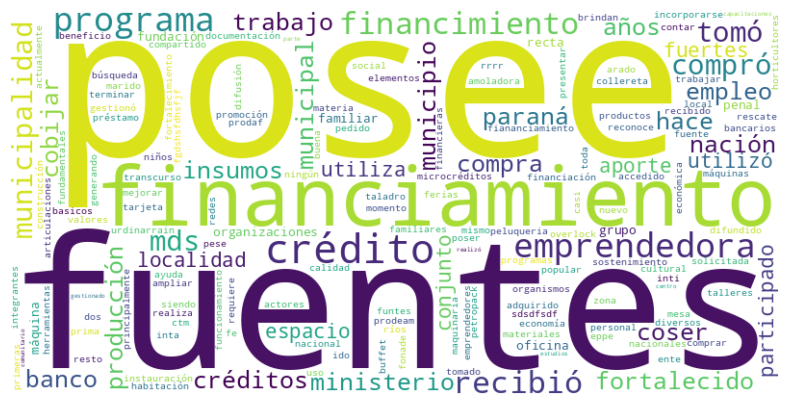

In [97]:
# Paso 1: Verificar si todos los valores son números en la columna
if (
    df_entrevistados[
        "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:"
    ]
    .apply(lambda x: str(x).isnumeric())
    .all()
):
    print(
        "La columna contiene solo números. No es necesario realizar el análisis de texto."
    )
else:
    print(
        "La columna contiene texto o una mezcla de texto y números. Proceder con el análisis."
    )


# Paso 2: Limpieza del texto
def limpiar_texto(texto):
    texto = re.sub(r"\d+", "", texto)  # Eliminar números
    texto = re.sub(r"[^\w\s]", "", texto)  # Eliminar signos de puntuación
    texto = texto.lower()  # Convertir a minúsculas
    return texto


# Aplicar la limpieza de texto a la columna "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?"
df_entrevistados[
    "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:"
] = df_entrevistados[
    "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:"
].apply(
    lambda x: limpiar_texto(str(x))
)

# Paso 3 y 4: Tokenización y eliminación de stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Definir las stopwords en español
stop_words = set(stopwords.words("spanish"))


# Función para tokenizar y eliminar stopwords
def contar_palabras(texto):
    palabras = word_tokenize(texto)  # Tokenizar
    palabras_filtradas = [
        word for word in palabras if word not in stop_words
    ]  # Filtrar stopwords
    return palabras_filtradas


# Aplicar la tokenización y contar las palabras clave
df_entrevistados["tokens"] = df_entrevistados[
    "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:"
].apply(lambda x: contar_palabras(x))

# Generar una lista de todas las palabras
palabras_financiamiento = [
    palabra for sublist in df_entrevistados["tokens"] for palabra in sublist
]

# Contar la frecuencia de las palabras
from collections import Counter

frecuencia_palabras = Counter(palabras_financiamiento)

# Paso 5: Generar la nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(frecuencia_palabras)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Quitar los ejes
plt.show()

**INSIGHTS💡** para el equipo técnico:

- **💰 Dependencia de otras fuentes de financiamiento**: Palabras como "préstamo", "crédito", y "prestamo familiar" sugieren que muchos emprendedores recurren a fuentes de financiamiento adicionales. Esto refleja que los emprendedores no dependen únicamente del programa gubernamental, lo que puede ser un indicador positivo de su capacidad para buscar y gestionar fondos.

- **❌ No acceso a financiamiento adicional**: Expresiones como "no ha recibido" y "sin financiamiento" son frecuentes, lo que indica que una parte significativa de los emprendedores no ha tenido acceso a otras fuentes de financiamiento aparte del programa.

- **👪 Financiación familiar o personal**: Menciones de "familia" y "ahorros" reflejan que algunos emprendedores dependen de apoyo familiar o recursos personales para complementar el financiamiento. Esto es relevante porque puede indicar una menor dependencia de instituciones financieras.

- **📊 Proporción de acceso**: La palabra "crédito" aparece repetidamente, lo que sugiere que hay una porción considerable de emprendedores que han recibido financiamiento adicional a través de programas de crédito o microcréditos. Esto puede ser un indicador de la bancarización y acceso a servicios financieros.

**Recomendaciones:**
- **Acceso a nuevas oportunidades de financiamiento**: Considerando la cantidad de emprendedores que no han tenido acceso a otras fuentes de financiamiento, sería útil fortalecer los vínculos con programas de microcrédito o instituciones financieras que puedan ofrecer condiciones más accesibles.
  
- **Diversificación de fuentes de financiamiento**: Fomentar que los emprendedores exploren más opciones de financiamiento podría ser clave para su sostenibilidad. Las palabras más recurrentes sugieren que hay margen para apoyar a los emprendedores a obtener capital de diversas fuentes.

- **Optimización del programa**: El equipo técnico podría orientar los esfuerzos a ayudar a los emprendedores que no han accedido a otras fuentes de financiamiento, permitiendo que más personas puedan fortalecer sus emprendimientos con acceso a recursos.

In [98]:
# Luego del analisis de columnas con posibilidad de categorizar, se procede a eliminar las columnas que no aportan valor a mi objetivo.
df_entrevistados = df_entrevistados.drop(
    columns=[
        "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:",
        "Evaluación Final:",
        "tokens",
    ]
)

df_entrevistados.shape

(1250, 42)

### 🛠️ Procesamiento de campos de selección múltiple:

Estas columnas contienen datos provenientes de respuestas de tipo selección múltiple, donde los emprendedores tuvieron la opción de elegir entre varias categorías predefinidas, pero también la posibilidad de seleccionar "Otro" y describir de manera libre su respuesta. Esto genera una combinación de valores categóricos y entradas personalizadas. El objetivo será estandarizar estas respuestas utilizando funciones que permitan procesar las opciones predefinidas y agrupar las respuestas personalizadas en nuevas categorías útiles. Este paso facilitará el análisis y comparación de las respuestas, proporcionando una visión más clara del comportamiento y necesidades de los emprendedores.

In [99]:
# Columnas a estandarizar:
columnas_a_estandarizar = [
    "En caso de haber recibido algún tipo de capacitación marque cuales:",
    "Antigüedad del Emprendimiento (Años):",
    "Antigüedad del Emprendimiento (Meses):",
    "Tiempo que dedica al emprendimiento (Días a la semana):",
    "Tiempo que dedica al emprendimiento (Horas por día):",
    "Cómo realiza sus ventas? / Cómo ofrece sus servicios?:",
    "Donde realiza su producción? / Donde ofrece su servicio?:",
    "Qué habilitaciones posee su espacio productivo?:",
    "Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:",
]

**En caso de haber recibido algún tipo de capacitación marque cuales:**

Pasos:
1) **Función para evaluar los valores repetidos en columnas con selección múltiple:** Función para evaluar los valores repetidos en columnas con selección múltiple.
2) **Función para agregar columnas basadas en categorías predefinidas:** Esta segunda función recibe como parámetros el DataFrame, una lista con categorías predefinidas y el nombre de la columna a evaluar. Luego, crea una nueva columna por cada categoría y llena los valores con 1 si coincide con alguna categoría, y 0 en caso contrario. Si no coincide con ninguna categoría, se asignará un 1 en la columna de "otros".
3) **Tokenización**: 

In [100]:
# 1. Función para evaluar los valores repetidos en columnas con selección múltiple:


def evaluar_valores_repetidos(df, columna, cant):
    # Asegurar que los valores de la columna sean strings y se separen por comas
    df[columna] = df[columna].astype(str).str.split(",")

    # Aplanar todas las listas y contar las ocurrencias de cada opción
    todas_las_opciones = [opcion.strip() for lista in df[columna] for opcion in lista]

    # Contar la frecuencia de cada opción
    frecuencia_opciones = Counter(todas_las_opciones)

    # Mostrar las opciones más frecuentes
    return frecuencia_opciones.most_common(cant)

In [101]:
# 2. Función para agregar columnas basadas en categorías predefinidas:


def agregar_columnas_categorias(df, columna, categorias, texto_personalizado):
    # Crear una columna para cada categoría, concatenando el texto personalizado al nombre
    for categoria in categorias:
        nombre_columna = f"{texto_personalizado}_{categoria}"
        df[nombre_columna] = 0

    # Generar el nombre de la columna "otros" basado en el texto personalizado
    nombre_otros = f"otros_{texto_personalizado}"
    df[nombre_otros] = 0

    # Iterar por cada celda de la columna
    for i, fila in df.iterrows():
        encontrado = False
        # Dividir las respuestas múltiples usando una coma como delimitador
        respuestas = str(fila[columna]).split(",")

        # Iterar por cada categoría
        for categoria in categorias:
            nombre_columna = f"{texto_personalizado}_{categoria}"
            for respuesta in respuestas:
                if (
                    categoria.strip() in respuesta.strip()
                ):  # Verificar si la categoría está presente
                    df.at[i, nombre_columna] = 1
                    encontrado = True

        # Si no se encontró ninguna coincidencia, marcar en la columna de "otros"
        if not encontrado:
            df.at[i, nombre_otros] = 1

In [102]:
# Aplico la función para evaluar valores repetidos en la columna "Donde realiza su producción? / Donde ofrece su servicio?:" y le pido que me muestre los 10 valores más repetidos.
evaluar_valores_repetidos(
    df_entrevistados, "Donde realiza su producción? / Donde ofrece su servicio?:", 10
)

[('En su casa. (No posee un espacio destinado al emprendimiento)', 473),
 ('En su casa. (Posee un espacio separado destinado al emprendimiento)', 358),
 ('En casa de sus clientes. / En obra.', 191),
 ('En un local aparte.', 123),
 ('Utiliza los talleres de la Unidad Penal para confeccionar sus productos. Gracias a su buen comportamiento ha obtenido el beneficio de residir en "La Modelo" (Espacio separado donde los internos cuentan con libertades para trabajar y moverse dentro de algunas zonas del establecimiento)',
  5),
 ('En el Río Paraná', 5),
 ('En zona de islas', 5),
 ('Utiliza los talleres de la Unidad Penal para confeccionar sus productos.',
  4),
 ('Utiliza el local de la Unidad Penal para la elaboración de sus productos.',
  4),
 ('El emprendedor pesca sobre el río Paraná', 4)]

In [103]:
# El resultado indica los valores mas repetidos, por lo que se procede a definir las categorias para la columna "Donde realiza su producción? / Donde ofrece su servicio?:"
categorias_definidas = [
    "En su casa. (No posee un espacio destinado al emprendimiento)",
    "En su casa. (Posee un espacio separado destinado al emprendimiento)",
    "En un local aparte",
    "En casa de sus clientes. / En obra.",
]

# Aplico la función para agregar columnas basadas en categorías predefinidas a la columna "Donde realiza su producción? / Donde ofrece su servicio?:"
agregar_columnas_categorias(
    df_entrevistados,
    "Donde realiza su producción? / Donde ofrece su servicio?:",
    categorias_definidas,
    "donde_prod_serv",
)

In [104]:
df_entrevistados.head(2)

,Marcar entrevista como:,Fecha de la entrevista-Final:,Equipo Técnico:,Localidad:,Departamento:,Fecha de Nacimiento-Final:,Sexo:,Estado Civil:,Nivel de Estudio Actual:,Situación Laboral PRINCIPAL:,Situación Habitacional:,Tipo de vivienda:,Situación ante el IVA:,Ingreso MENSUAL de su Economía Familiar:,Descripción del Emprendimiento:,Antigüedad del Emprendimiento (Años):,Antigüedad del Emprendimiento (Meses):,Tiempo que dedica al emprendimiento (Días a la semana):,Tiempo que dedica al emprendimiento (Horas por día):,Realizó algún tipo de capacitación previa para su emprendimiento:,Cómo realiza sus ventas? / Cómo ofrece sus servicios?:,Utiliza tarjeta de crédito para realizar sus ventas?:,Cantidad de clientes:,Ganancia Mensual-Final:,El emprendimiento se desarrolla en un ámbito:,Donde realiza su producción? / Donde ofrece su servicio?:,Condiciones del espacio físico donde desarrolla el emprendimiento:,Qué habilitaciones posee su espacio productivo?:,Servicio Eléctrico:,Servicio de Gas:,Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:,Equipamiento con el que cuenta:,Herramientas o equipamiento que solicita:,Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as:,Devolución con respecto a la gestión de la herramienta o equipamiento:,Herramienta/as aprobada/as por Equipo Técnico:,Rubro:,Sub-Rubro-Final:,Actividad-Final:,Producción semanal,Espacio productivo,Inversion fortalecimiento,donde_prod_serv_En su casa. (No posee un espacio destinado al emprendimiento),donde_prod_serv_En su casa. (Posee un espacio separado destinado al emprendimiento),donde_prod_serv_En un local aparte,donde_prod_serv_En casa de sus clientes. / En obra.,otros_donde_prod_serv
0,La entrevista se realizó correctamente.,2016-03-17 00:00:00,Gisela,Gualeguaychú,Gualeguaychú,1971-02-09 00:00:00,Femenino,Casada/o,Secundario Completo,Autoempleado,Vivienda Alquilada,TIPO B,Monotributo Social,6000.0,"Pre pizzas, pasta frolas, cremonas, pan sabori...",12.0,0.0,48.0,0.0,SI,"Tiene un puesto fijo en una Feria., Coordina l...",NO,,1500,Urbano,[En su casa. (No posee un espacio destinado al...,Regular.,Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,"Horno 6 moldes pizzero, Heladera familiar, bat...",Amasadora y sobadora de mesa,Para agregar otros productos con hojaldre y ag...,Aprobado,Amasadora y Sobadora,Producción,PANIFICACIÓN,Pastelería,Variable,Deficiente,Equipamiento,1,0,0,0,0
1,La entrevista se realizó correctamente.,2016-03-18 00:00:00,Rodrigo,Victoria,Victoria,1971-02-10 00:00:00,Masculino,Casada/o,Secundario Incompleto,Empleado,Vivienda Propia,Tipo A,No se encuentra inscripto,8000.0,Claudio lleva adelante un emprendimiento dedic...,5.0,6.0,6.0,5.0,SI,La gente lo conoce y va a su domicilio o lo llama,NO,posee alrededor de cuarenta clientes fijos y u...,3500,Urbano,[En su casa. (Posee un espacio separado destin...,Bueno.,Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,"Moto-esmeriladora de banco, cargador de baterí...",Soldadora autógena.,El emprendedor utilizará esta herramientas par...,Aprobado,Soldadora Autógena,Servicios generales,Servicio mecánico,Mecánica del automotor,Intermedio,Trabajo a Domicilio,Herramientas,0,1,0,0,0


In [105]:
# Elimino la columna "Donde realiza su producción? / Donde ofrece su servicio?:"
df_entrevistados = df_entrevistados.drop(
    columns=["Donde realiza su producción? / Donde ofrece su servicio?:"]
)

Resumen de lo que se hizo:

1. **Procesamiento de columnas de selección múltiple**: Se implementó una función para manejar columnas con respuestas de selección múltiple en el DataFrame. Estas columnas contenían texto donde los emprendedores podían seleccionar varias opciones predefinidas o escribir respuestas personalizadas. El texto en las celdas estaba concatenado y separado por comas, lo que requería un enfoque específico para descomponer y analizar correctamente la información.

2. **Creación de nuevas columnas**: Se crearon nuevas columnas para cada opción predefinida de selección múltiple. Por ejemplo, si un emprendedor seleccionaba "En su casa" y "En casa de sus clientes", se generaban columnas con estos nombres y se asignaba un valor de 1 si esa opción estaba presente.

3. **Manejo de "otros"**: Si una respuesta no coincidía con ninguna de las opciones predefinidas, se colocaba un 1 en una columna de "otros", lo que permite capturar y analizar respuestas personalizadas. La función fue adaptada para manejar correctamente los casos donde se seleccionaron varias opciones. Ahora, si una celda contiene varias categorías separadas por comas, se asignan 1s a todas las categorías aplicables, lo que mejora la precisión del análisis.


Importancia para el futuro análisis:

- **Estandarización de datos**: Este proceso permite estandarizar y estructurar los datos de selección múltiple, que inicialmente venían en un formato de texto poco estructurado. Esto facilita la comparación entre emprendedores y permite un análisis más preciso de las respuestas.
  
- **Facilidad para identificar patrones**: Ahora es mucho más fácil identificar patrones de comportamiento. Por ejemplo, se puede observar cuántos emprendedores trabajan en casa y cuántos lo hacen en un local, o cuántos han recibido algún tipo de capacitación. Este tipo de análisis es esencial para evaluar las necesidades y preferencias de los emprendedores.
  
- **Detección de respuestas personalizadas**: Al capturar las respuestas que no encajan en las categorías predefinidas mediante la columna "otros", no se pierde información valiosa que podría ser relevante para identificar casos atípicos o nuevas tendencias.
  
- **Mejora la calidad de los datos**: La estructuración adecuada de las respuestas mejora la calidad del conjunto de datos, permitiendo realizar análisis más profundos como correlaciones, clasificaciones o incluso modelos predictivos.

En resumen, el procesamiento y estandarización de las columnas de selección múltiple asegura que la información esté bien organizada y lista para ser utilizada en análisis futuros, lo que facilitará la toma de decisiones basadas en datos más claros y precisos.

### 🕵️‍♂️ Imputación de valores basada en conocimiento experto:

Para ciertas columnas donde los datos faltantes pueden ser completados con el conocimiento especializado del equipo técnico, se procederá a una imputación manual de valores. Esta tarea requerirá la colaboración con los expertos del programa para analizar y tomar decisiones sobre la información faltante. Aunque este proceso es más complejo y demandante de tiempo, es crucial para asegurar la mayor precisión en el análisis de los datos. A futuro, estas imputaciones podrán ayudar a mejorar la calidad de la base de datos y las decisiones basadas en ella.